# **EDA**

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [3]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1R4_biFY4l4jwmaMMzOh5cgB1nB6Eb1z1'}) # replace the id with id of file you want to access
downloaded.GetContentFile('application_train.csv') 


In [ ]:
downloaded = drive.CreateFile({'id':'1ni9rz70QVjmB026wuY2qgjbgw-MV3EAr'}) # replace the id with id of file you want to access
downloaded.GetContentFile('application_test.csv') 


In [ ]:
train = pd.read_csv('application_train.csv')
print(train.shape)

In [ ]:
test=pd.read_csv("application_test.csv")
print(test.shape)

# **TRAIN.CSV and TEST.CSV**

**GENDER**

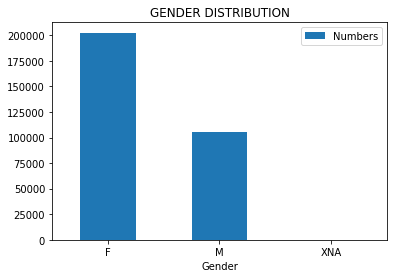

In [12]:
df = pd.DataFrame({'Gender':train.CODE_GENDER.value_counts().index.tolist(), 'Numbers':train.CODE_GENDER.value_counts()})
ax = df.plot.bar(x='Gender', y='Numbers', rot=0)
plt.title("GENDER DISTRIBUTION")
plt.show()

In [13]:
index = train[ train['CODE_GENDER'] == "XNA" ].index
train.drop(index , inplace=True)

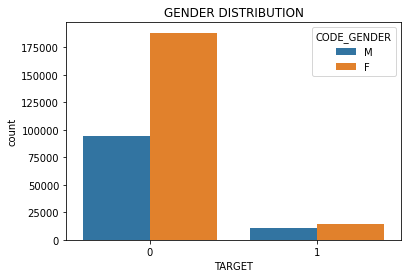

In [14]:
ax = sns.countplot(x="TARGET", hue="CODE_GENDER", data=train)
plt.title("GENDER DISTRIBUTION")
plt.show()

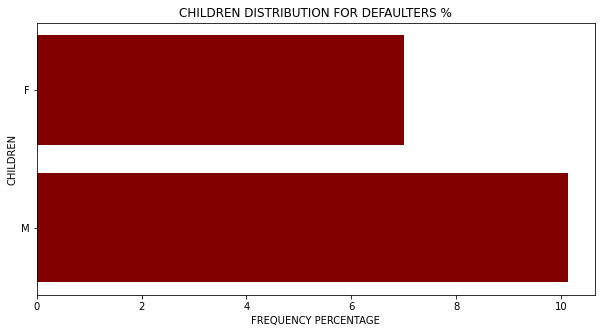

M = 10.141920254333279%
F = 6.999328222555915%


In [15]:
name=train[train['TARGET']==1].CODE_GENDER.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==1].CODE_GENDER
    val.append(temp[temp==i].value_counts()*100/train[train["CODE_GENDER"]==i].CODE_GENDER.value_counts())
val=[i.values[0] for i in val]
name=[str(i) for i in name]
fig = plt.figure(figsize = (10, 5))
plt.barh(name, val, color ='maroon')
plt.title("CHILDREN DISTRIBUTION FOR DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("CHILDREN")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

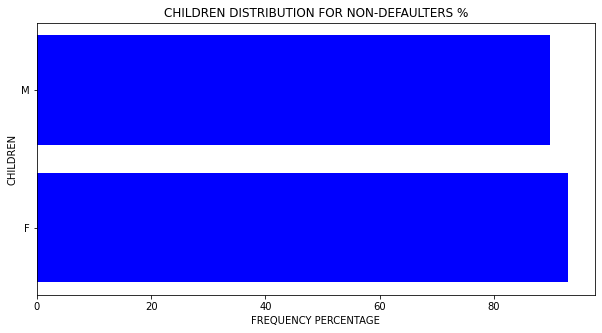

F = 93.00067177744408%
M = 89.85807974566671%


In [16]:
name=train[train['TARGET']==0].CODE_GENDER.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==0].CODE_GENDER
    val.append(temp[temp==i].value_counts()*100/train[train["CODE_GENDER"]==i].CODE_GENDER.value_counts())
val=[i.values[0] for i in val]
name=[str(i) for i in name]
fig = plt.figure(figsize = (10, 5))
plt.barh(name, val, color ='blue')
plt.title("CHILDREN DISTRIBUTION FOR NON-DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("CHILDREN")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

In [17]:
train[train["CODE_GENDER"]=="F"].TARGET.value_counts()

0    188278
1     14170
Name: TARGET, dtype: int64

In [18]:
train[train["CODE_GENDER"]=="F"].shape

(202448, 122)

In [19]:
train[train["CODE_GENDER"]=="M"].shape

(105059, 122)

Observation:
- We first see that apart from male and female there's another gender termed as XNA. In total there are 4 entries which do not have a gender specified. We shall visit this back during the time of preprocessing to remove if required

- We now barplot the gender category specifying which gender is able to repay the loan better. 
- On printing the all the male and female clients on basis of they being able to repay their loan or not we are able to observe that its majorly females who fail to repay their loans.

**DAYS OLD**

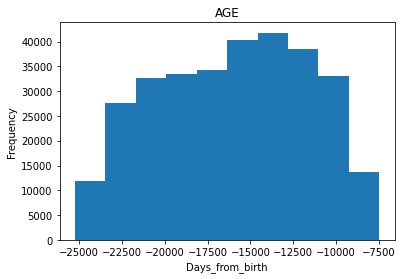

In [20]:
train['DAYS_BIRTH'].plot.hist(title ="AGE");
plt.xlabel('Days_from_birth');

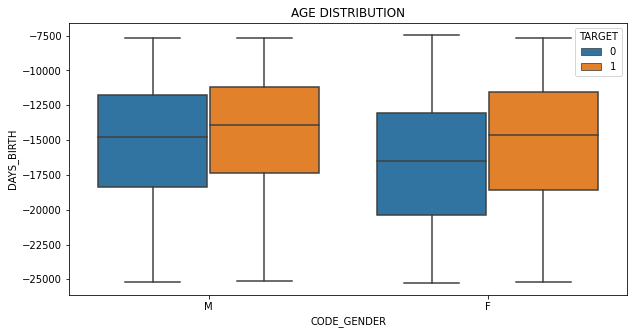

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x="CODE_GENDER",y="DAYS_BIRTH", hue="TARGET", data=train)
plt.title("AGE DISTRIBUTION")
plt.show()

Observation:
- The vaules in the days old column seem fine as the maximum number of days that a person is old is coming to 69 years i.e. around 25000 days
- On plotting the GENDER and their age with respect to their loan repayment success. We can see that both in case of male and female the younger age people have more problems in paying back the loan as compared to older people

**No OF DAYS EMPLOYED**

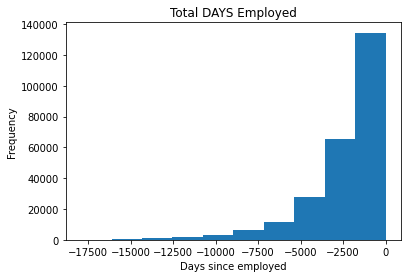

In [ ]:
train['DAYS_EMPLOYED'].plot.hist(title ='Total DAYS Employed');
plt.xlabel('Days since employed');

In [ ]:
train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)


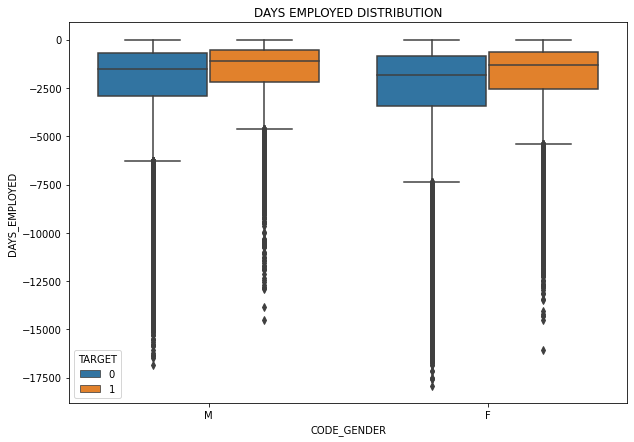

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(x="CODE_GENDER",y="DAYS_EMPLOYED", hue="TARGET", data=train)
plt.title("DAYS EMPLOYED DISTRIBUTION")
plt.show()

Observation:
- We see that there's an approximate of 50000 data points with no of days employed as 350000+ which is practically impossible. Instead of removing these rows as its almost 17% of the data we can replace it with nan. We shall do that in our preprocessing step

- On plotting the GENDER and their employment days with respect to their loan repayment success. Again its observed that people  that have been employed for longer duration have been able to pay their loans more easily in both male and female compared to lesser employed duration clients

**CHILDREN**

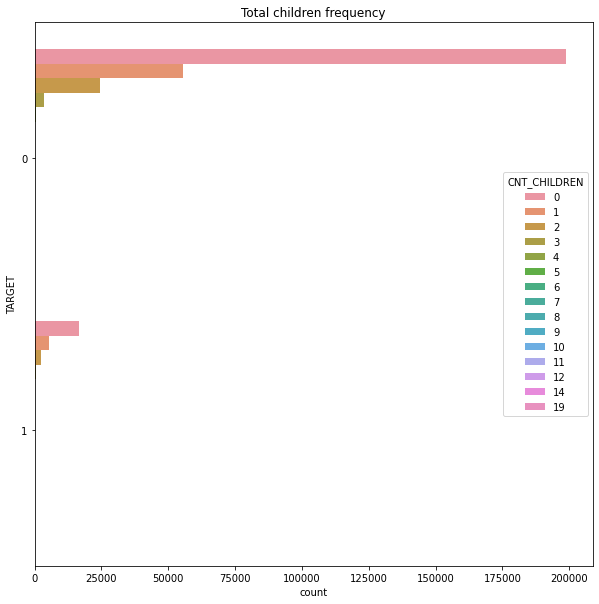

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y="TARGET",hue="CNT_CHILDREN", data=train)
plt.title("Total children frequency")
plt.show()

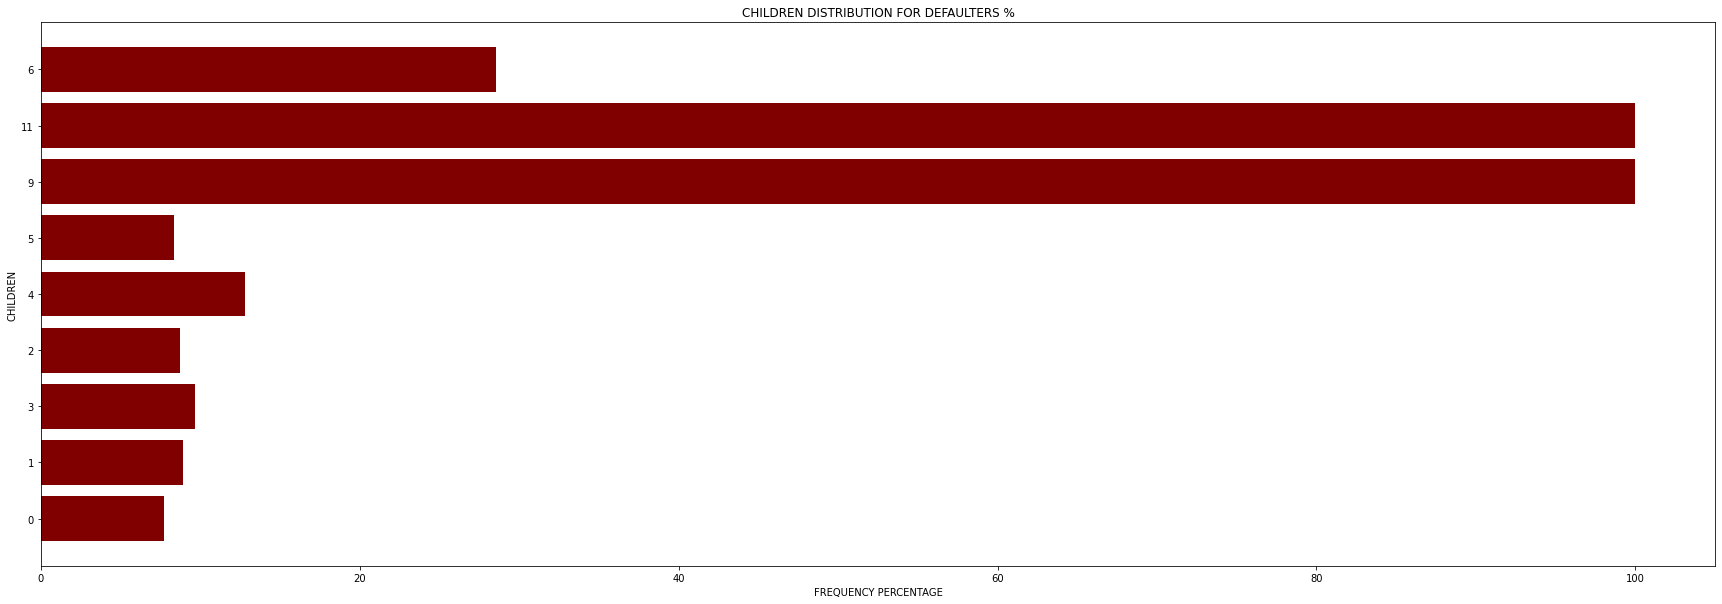

0 = 7.711880539910572%
1 = 8.923721325959619%
3 = 9.631423190745224%
2 = 8.722147450276656%
4 = 12.820512820512821%
5 = 8.333333333333334%
9 = 100.0%
11 = 100.0%
6 = 28.571428571428573%


In [ ]:
name=train[train['TARGET']==1].CNT_CHILDREN.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==1].CNT_CHILDREN
    val.append(temp[temp==i].value_counts()*100/train[train["CNT_CHILDREN"]==i].CNT_CHILDREN.value_counts())
val=[i.values[0] for i in val]
name=[str(i) for i in name]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='maroon')
plt.title("CHILDREN DISTRIBUTION FOR DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("CHILDREN")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

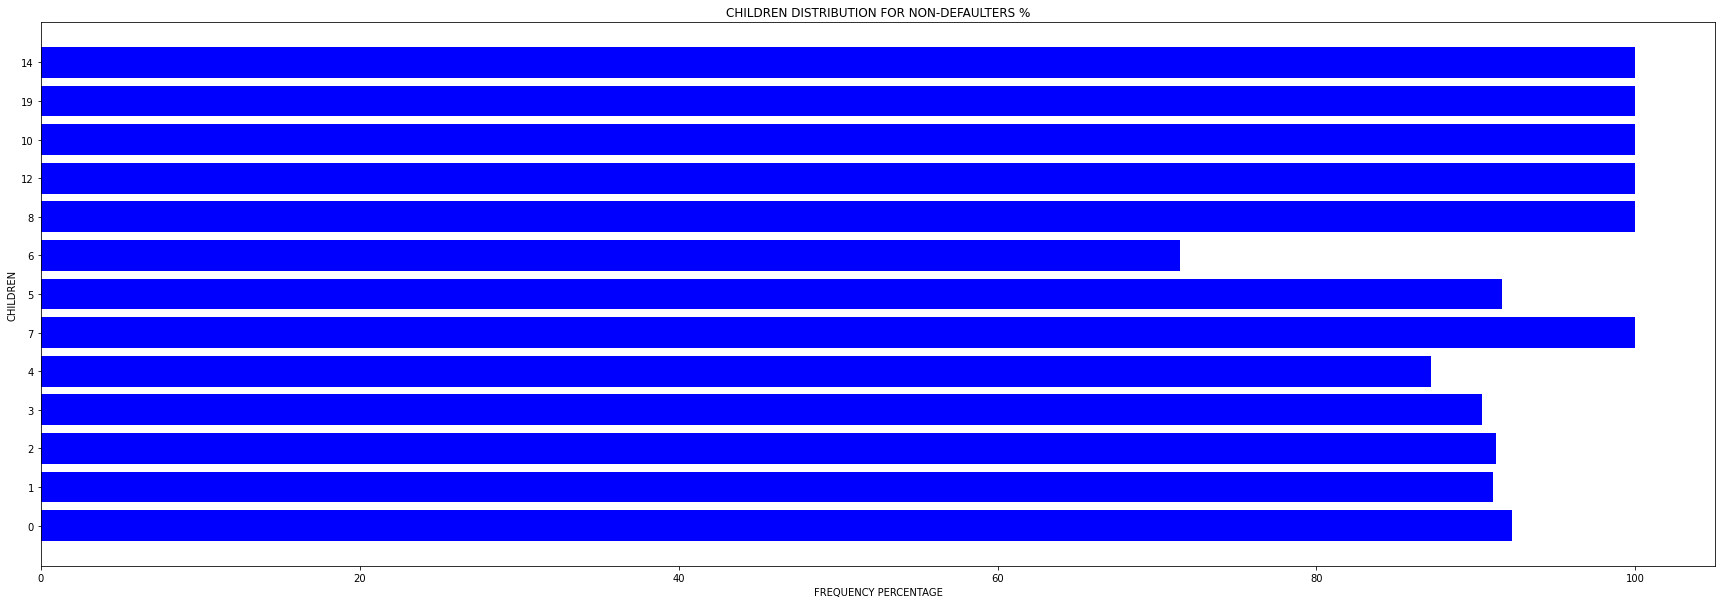

0 = 92.28811946008943%
1 = 91.07627867404038%
2 = 91.27785254972335%
3 = 90.36857680925478%
4 = 87.17948717948718%
7 = 100.0%
5 = 91.66666666666667%
6 = 71.42857142857143%
8 = 100.0%
12 = 100.0%
10 = 100.0%
19 = 100.0%
14 = 100.0%


In [ ]:
name=train[train['TARGET']==0].CNT_CHILDREN.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==0].CNT_CHILDREN
    val.append(temp[temp==i].value_counts()*100/train[train["CNT_CHILDREN"]==i].CNT_CHILDREN.value_counts())
val=[i.values[0] for i in val]
name=[str(i) for i in name]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='blue')
plt.title("CHILDREN DISTRIBUTION FOR NON-DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("CHILDREN")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

Observation
- People with 0 children borrow maximum loans
- Its observed that its not a huge change but having children does affect the repayment of loan with as the number of children increases so does their difficulty to repay back the loans.

Thus it could be said more number of children perfamily increases the risk of repayment of loan slightly

**OCCUPATION TYPE**

In [ ]:
x=[]
for i in train.OCCUPATION_TYPE.unique():
    if not(pd.isna(i)):
        x.append(i)

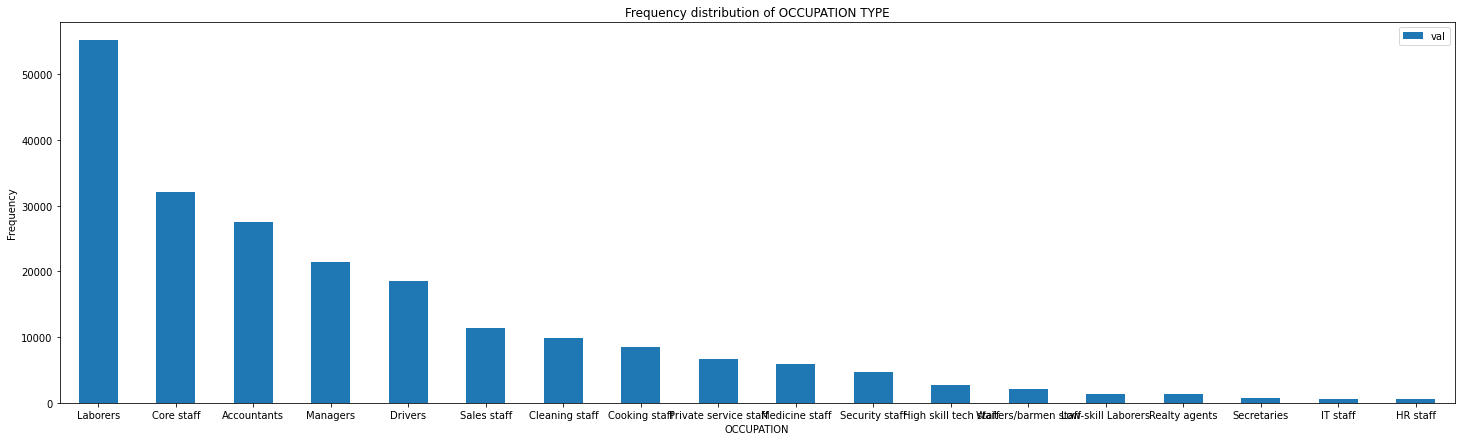

In [ ]:
df = pd.DataFrame({'lab':x, 'val':train.OCCUPATION_TYPE.value_counts()})
ax = df.plot.bar(x='lab', y='val', rot=0,figsize=(25,7))
plt.title("Frequency distribution of OCCUPATION TYPE")
plt.xlabel("OCCUPATION")
plt.ylabel("Frequency")
plt.show()

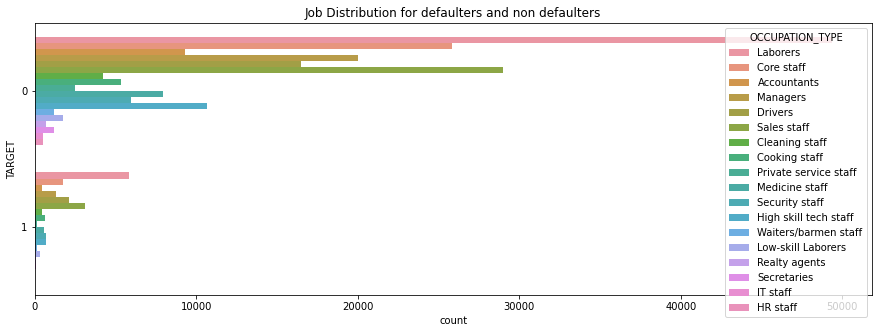

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(y="TARGET",hue="OCCUPATION_TYPE", data=train,linewidth=20)
plt.title("Job Distribution for defaulters and non defaulters")
plt.show()

Observation:
- Here we see that there are in total 19 distinct categories out of which one of them is nan. We cannot remove those columns as it has 96k entries.

- If we ignore the nan values and print the other categories we see that the category of labour class takes the most loan among all the categories and its the labour class itself which has the most difficulty in repaying the loans.
- its followed by sales staff and core 

from the above graph it can be concluded that lower class jobs have a greater difficulty is repaying their loans as compared to others.

**CHILDREN AND OCCUPATION**

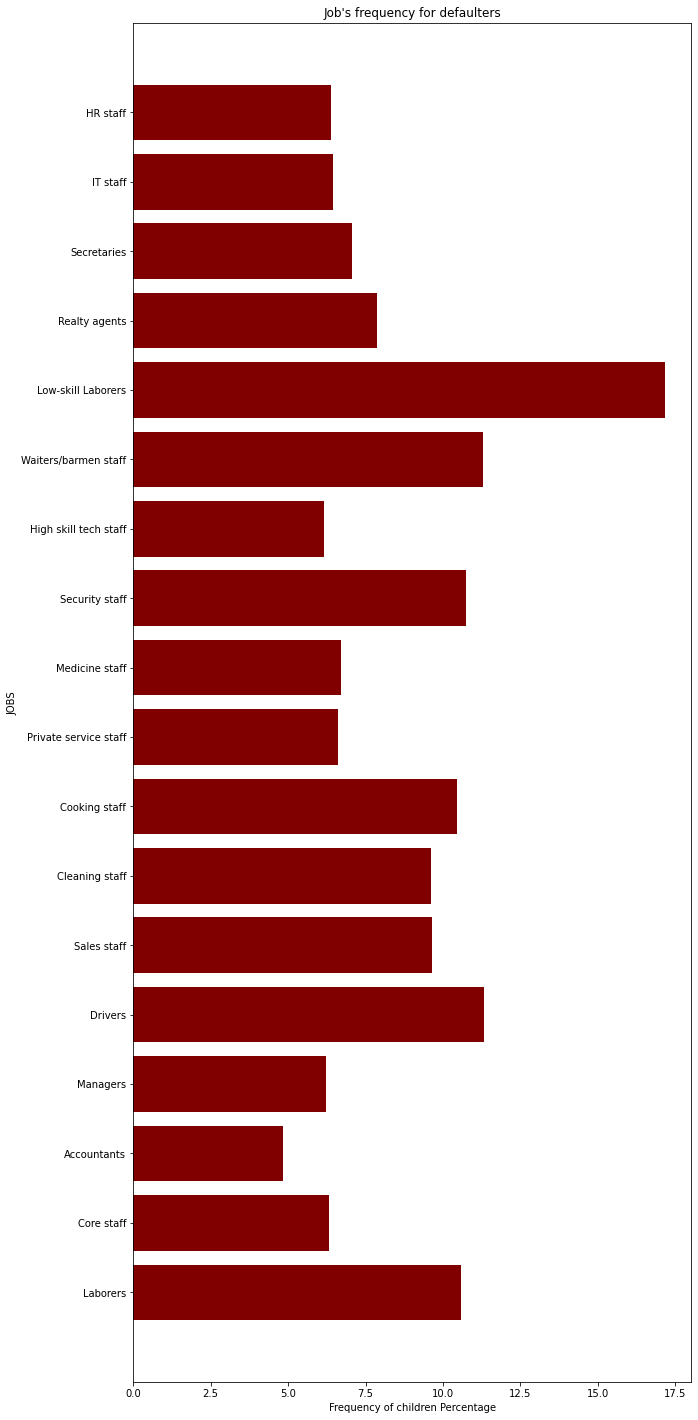

Laborers = 10.578769977892945%
Core staff = 6.304182233668251%
Accountants = 4.830327117089575%
Managers = 6.214028356183613%
Drivers = 11.326130194054722%
Sales staff = 9.63179864182917%
Cleaning staff = 9.606705351386202%
Cooking staff = 10.443995963673057%
Private service staff = 6.5987933634992455%
Medicine staff = 6.700245988052009%
Security staff = 10.74244904032138%
High skill tech staff = 6.1599297012302285%
Waiters/barmen staff = 11.275964391691394%
Low-skill Laborers = 17.16061185468451%
Realty agents = 7.856191744340879%
Secretaries = 7.049808429118774%
IT staff = 6.4638783269961975%
HR staff = 6.394316163410302%


In [ ]:
occupation=[]
for i in train.OCCUPATION_TYPE.unique():
    if not(pd.isna(i)):
        occupation.append(i)
val=[]
for i in occupation:
    temp=train[train['TARGET']==1].OCCUPATION_TYPE
    val.append(temp[temp==i].value_counts()*100/train[train["OCCUPATION_TYPE"]==i].OCCUPATION_TYPE.value_counts())
val=[i.values[0] for i in val]
occupation=[str(i) for i in occupation]
fig = plt.figure(figsize = (10, 25))
plt.barh(occupation, val, color ='maroon')
plt.title("Job's frequency for defaulters")
plt.ylabel("JOBS")
plt.xlabel("Frequency of children Percentage")
plt.show()
for i in range(len(occupation)):
  print(str(occupation[i])+" = "+str(val[i])+"%")

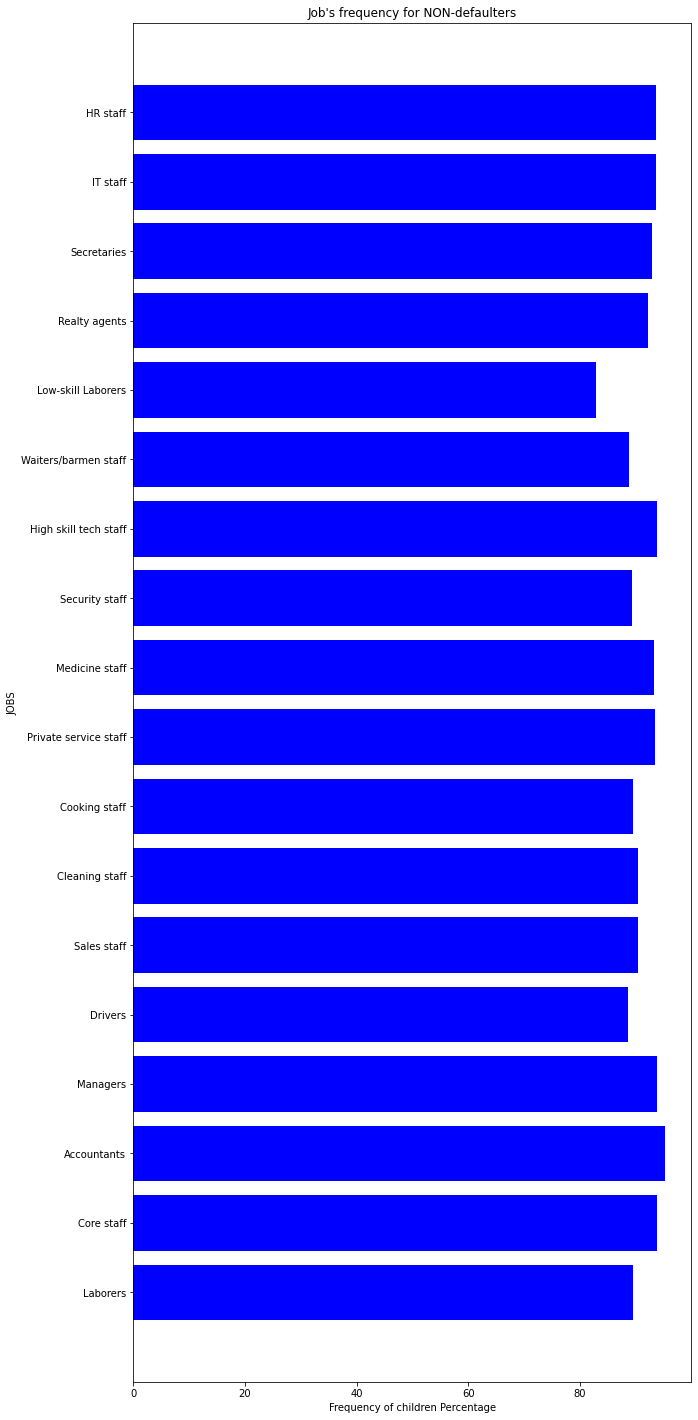

Laborers = 89.42123002210705%
Core staff = 93.69581776633174%
Accountants = 95.16967288291042%
Managers = 93.78597164381638%
Drivers = 88.67386980594527%
Sales staff = 90.36820135817084%
Cleaning staff = 90.3932946486138%
Cooking staff = 89.55600403632694%
Private service staff = 93.40120663650076%
Medicine staff = 93.299754011948%
Security staff = 89.25755095967862%
High skill tech staff = 93.84007029876977%
Waiters/barmen staff = 88.72403560830861%
Low-skill Laborers = 82.83938814531548%
Realty agents = 92.14380825565912%
Secretaries = 92.95019157088123%
IT staff = 93.5361216730038%
HR staff = 93.6056838365897%


In [ ]:
occupation=[]
for i in train.OCCUPATION_TYPE.unique():
    if not(pd.isna(i)):
        occupation.append(i)
val=[]
for i in occupation:
    temp=train[train['TARGET']==0].OCCUPATION_TYPE
    val.append(temp[temp==i].value_counts()*100/train[train["OCCUPATION_TYPE"]==i].OCCUPATION_TYPE.value_counts())
val=[i.values[0] for i in val]
occupation=[str(i) for i in occupation]
fig = plt.figure(figsize = (10, 25))
plt.barh(occupation, val, color ='blue')
plt.title("Job's frequency for NON-defaulters")
plt.ylabel("JOBS")
plt.xlabel("Frequency of children Percentage")
plt.show()
for i in range(len(occupation)):
  print(str(occupation[i])+" = "+str(val[i])+"%")

OBSERVATION:
- It is also observed that the class having the most default cases also have the high number of kids in their category thus proving a corelation in between the two.

Thus it could be said that both affect one another when it comes down to paying loans and could be a vitial information

**ORGANIZATION TYPE**

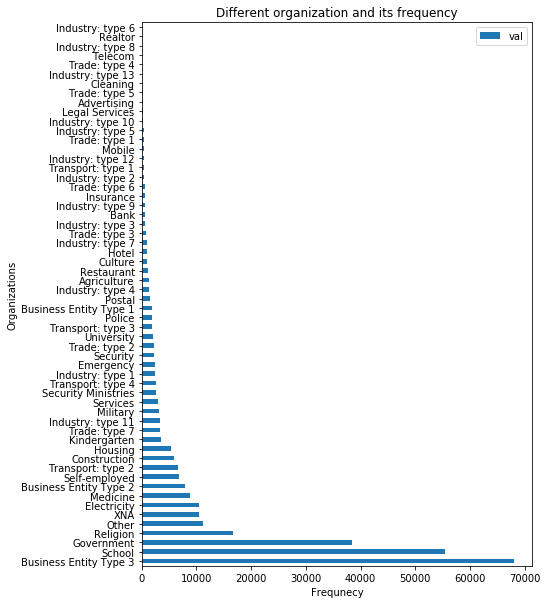

In [ ]:
df = pd.DataFrame({'lab':train['ORGANIZATION_TYPE'].unique(), 'val':train.ORGANIZATION_TYPE.value_counts()})
ax = df.plot.barh(x='lab', y='val', rot=0,figsize=(7,10))
plt.title("Different organization and its frequency")
plt.xlabel("Frequnecy")
plt.ylabel("Organizations")
plt.show()

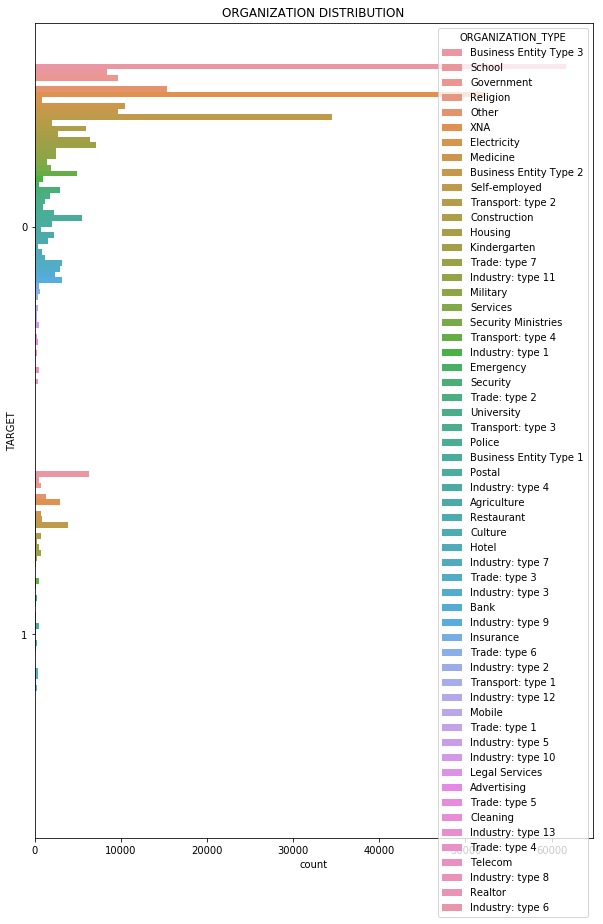

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
sns.countplot(y="TARGET",hue="ORGANIZATION_TYPE", data=train)
plt.title("ORGANIZATION DISTRIBUTION")
plt.show()

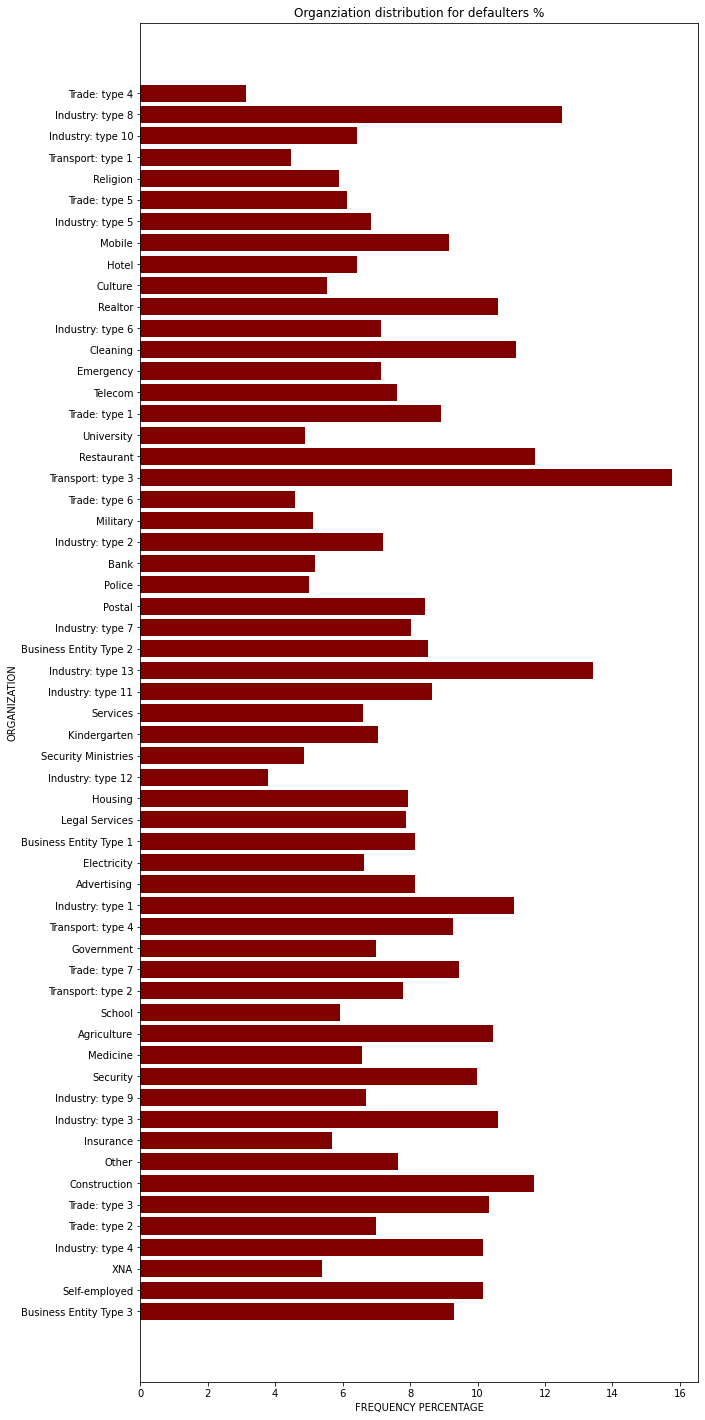

Business Entity Type 3 = 9.299623485115896%
Self-employed = 10.173903988336978%
XNA = 5.399646043269405%
Industry: type 4 = 10.148232611174459%
Trade: type 2 = 7.0%
Trade: type 3 = 10.337915234822452%
Construction = 11.679809552149978%
Other = 7.642510339866931%
Insurance = 5.695142378559464%
Industry: type 3 = 10.619469026548673%
Industry: type 9 = 6.680522565320665%
Security = 9.978441638435479%
Medicine = 6.58506075768406%
Agriculture = 10.472697636511818%
School = 5.914764421455077%
Transport: type 2 = 7.80399274047187%
Trade: type 7 = 9.44962329204444%
Government = 6.978085351787774%
Transport: type 4 = 9.28121526491293%
Industry: type 1 = 11.068334937439847%
Advertising = 8.158508158508159%
Electricity = 6.631578947368421%
Business Entity Type 1 = 8.13972923282634%
Legal Services = 7.868852459016393%
Housing = 7.944557133198106%
Industry: type 12 = 3.794037940379404%
Security Ministries = 4.86322188449848%
Kindergarten = 7.035906381741532%
Services = 6.603174603174603%
Industry: 

In [ ]:
name=train[train['TARGET']==1].ORGANIZATION_TYPE.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==1].ORGANIZATION_TYPE
    val.append(temp[temp==i].value_counts()*100/train[train["ORGANIZATION_TYPE"]==i].ORGANIZATION_TYPE.value_counts())
val=[i[0] for i in val]
fig = plt.figure(figsize = (10, 25))
plt.barh(name, val, color ='maroon')
plt.title("Organziation distribution for defaulters %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("ORGANIZATION")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

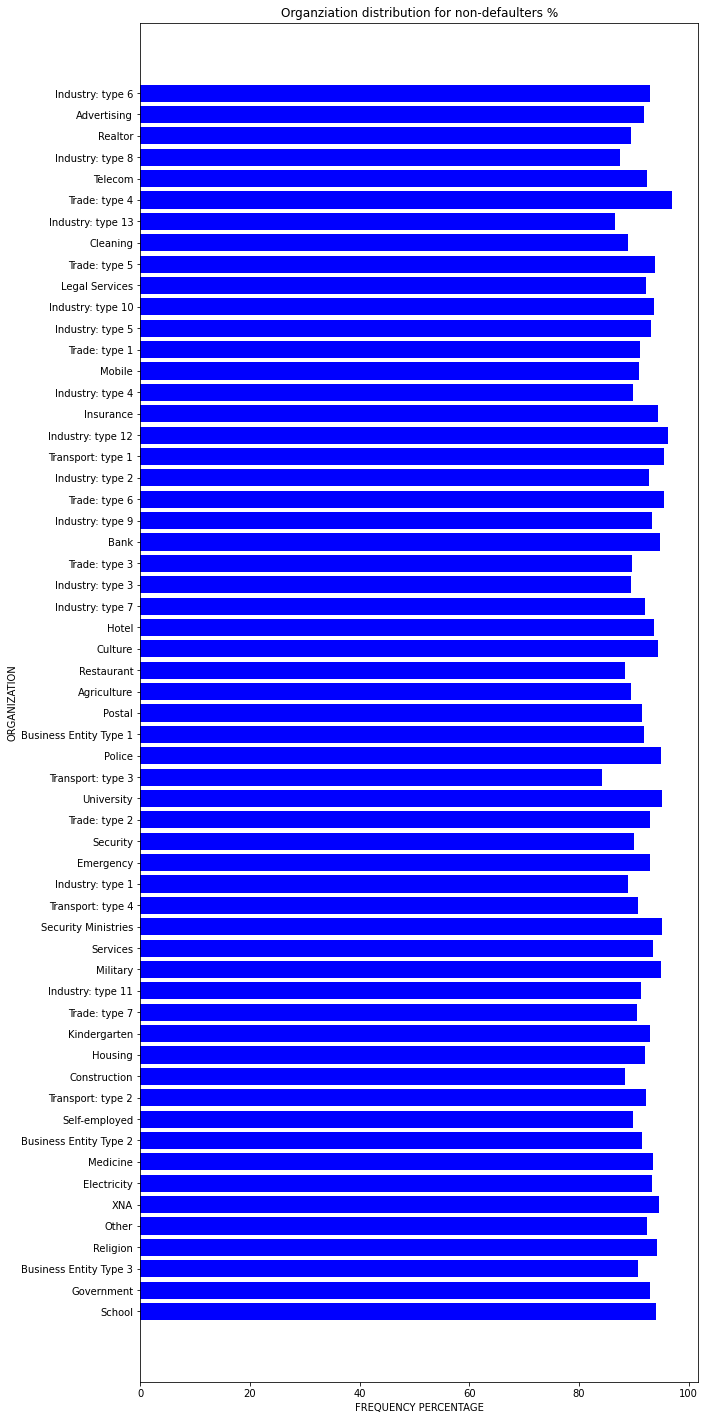

School = 94.08523557854492%
Government = 93.02191464821223%
Business Entity Type 3 = 90.7003765148841%
Religion = 94.11764705882354%
Other = 92.35748966013307%
XNA = 94.6003539567306%
Electricity = 93.36842105263158%
Medicine = 93.41493924231594%
Business Entity Type 2 = 91.47161944470767%
Self-employed = 89.82609601166303%
Transport: type 2 = 92.19600725952813%
Construction = 88.32019044785002%
Housing = 92.0554428668019%
Kindergarten = 92.96409361825847%
Trade: type 7 = 90.55037670795556%
Industry: type 11 = 91.34615384615384%
Military = 94.874715261959%
Services = 93.39682539682539%
Security Ministries = 95.13677811550151%
Transport: type 4 = 90.71878473508707%
Industry: type 1 = 88.93166506256016%
Emergency = 92.85714285714286%
Security = 90.02155836156452%
Trade: type 2 = 93.0%
University = 95.10173323285606%
Transport: type 3 = 84.24599831508003%
Police = 95.00213583938488%
Business Entity Type 1 = 91.86027076717366%
Postal = 91.56235512285582%
Agriculture = 89.52730236348819%
Re

In [ ]:
name=train[train['TARGET']==0].ORGANIZATION_TYPE.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==0].ORGANIZATION_TYPE
    val.append(temp[temp==i].value_counts()*100/train[train["ORGANIZATION_TYPE"]==i].ORGANIZATION_TYPE.value_counts())
val=[i[0] for i in val]
fig = plt.figure(figsize = (10, 25))
plt.barh(name, val, color ='blue')
plt.title("Organziation distribution for non-defaulters %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("ORGANIZATION")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

Observation:
- We observe that there are multiple orgazination groups (in total 53) out of which the highest one Business type 3. There are also 53k entries with type as XNA. It could be that XNA means unclassified for this feature.

- After plotting we see that the people who have the most difficulty in repaying the loan amount is also the Business type 3. But for the transportation type 2 the defaulters rate is quite high even though there they are much less when it comes to borrowing. 
- industry type 12 and trade type 4 shows the lowest default rate and is safest out of all




**INCOME TYPE**

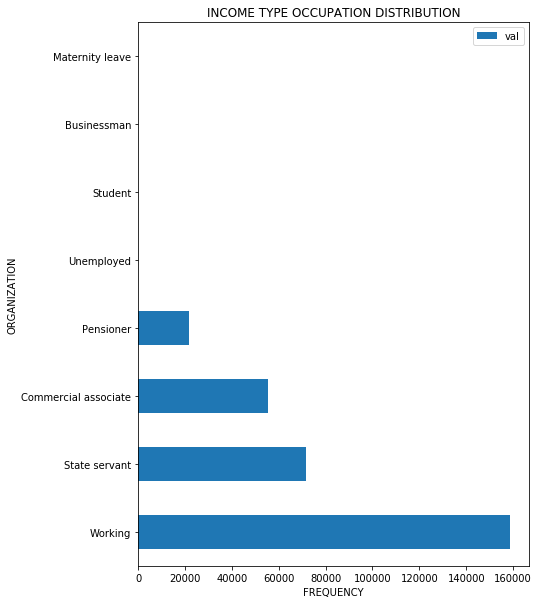

In [ ]:
df = pd.DataFrame({'lab':train['NAME_INCOME_TYPE'].unique(), 'val':train.NAME_INCOME_TYPE.value_counts()})
ax = df.plot.barh(x='lab', y='val', rot=0,figsize=(7,10))
plt.title("INCOME TYPE OCCUPATION DISTRIBUTION")
plt.xlabel("FREQUENCY")
plt.ylabel("ORGANIZATION")
plt.show()

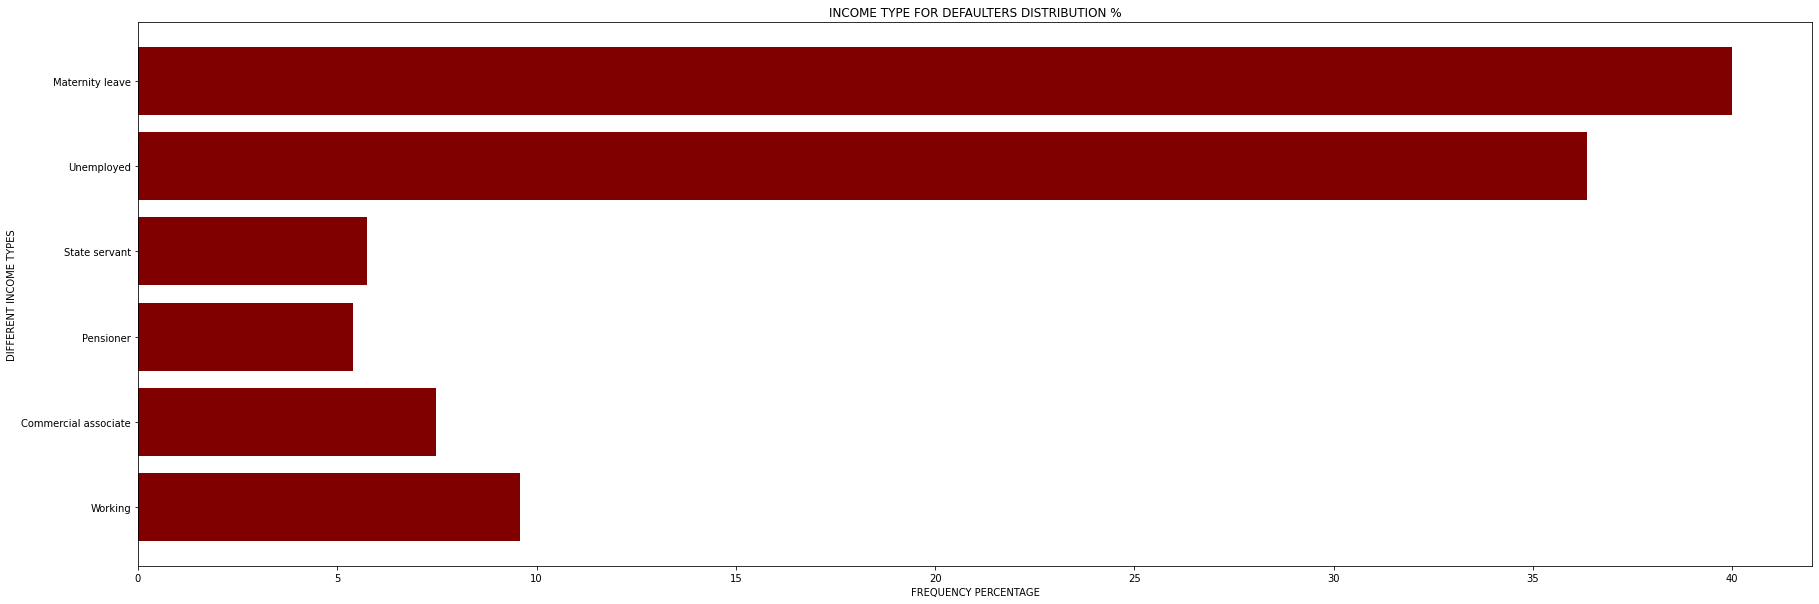

Working = 9.588652839624364%
Commercial associate = 7.484361036639857%
Pensioner = 5.386366099490625%
State servant = 5.754964751416855%
Unemployed = 36.36363636363637%
Maternity leave = 40.0%


In [ ]:
name=train[train['TARGET']==1].NAME_INCOME_TYPE.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==1].NAME_INCOME_TYPE
    val.append(temp[temp==i].value_counts()*100/train[train["NAME_INCOME_TYPE"]==i].NAME_INCOME_TYPE.value_counts())
val=[i[0] for i in val]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='maroon')
plt.title("INCOME TYPE FOR DEFAULTERS DISTRIBUTION %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("DIFFERENT INCOME TYPES")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

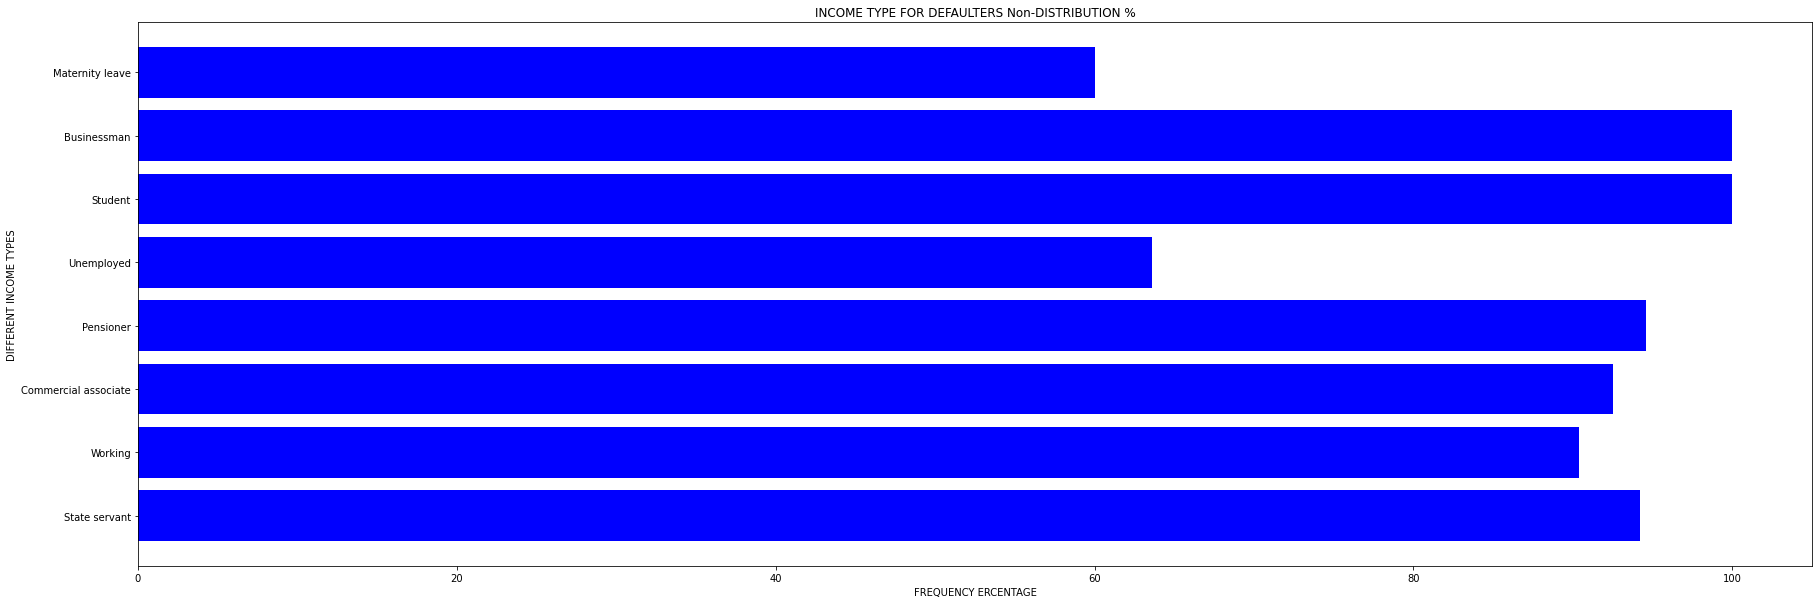

State servant = 94.24503524858315%
Working = 90.41134716037564%
Commercial associate = 92.51563896336015%
Pensioner = 94.61363390050937%
Unemployed = 63.63636363636363%
Student = 100.0%
Businessman = 100.0%
Maternity leave = 60.0%


In [ ]:
name=train[train['TARGET']==0].NAME_INCOME_TYPE.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==0].NAME_INCOME_TYPE
    val.append(temp[temp==i].value_counts()*100/train[train["NAME_INCOME_TYPE"]==i].NAME_INCOME_TYPE.value_counts())
val=[i[0] for i in val]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='blue')
plt.title("INCOME TYPE FOR DEFAULTERS Non-DISTRIBUTION %")
plt.xlabel("FREQUENCY ERCENTAGE")
plt.ylabel("DIFFERENT INCOME TYPES")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

Observation:
-  There are majorly 8 types of income type out of which we see that the working type are the people who opt for loans
- On plotting its obsrved that people on maternity leave and unemployed face the most difficulty in repaying their loans
Thus it can be stated that people who are not working could face difficulty in repaying back the loans

**REAL ESTATE**

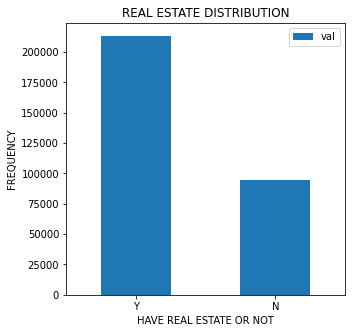

In [25]:
df = pd.DataFrame({'lab':train['FLAG_OWN_REALTY'].unique(), 'val':train.FLAG_OWN_REALTY.value_counts()})
ax = df.plot.bar(x='lab', y='val', rot=0,figsize=(5,5))
plt.title("REAL ESTATE DISTRIBUTION")
plt.xlabel("HAVE REAL ESTATE OR NOT")
plt.ylabel("FREQUENCY")
plt.show()

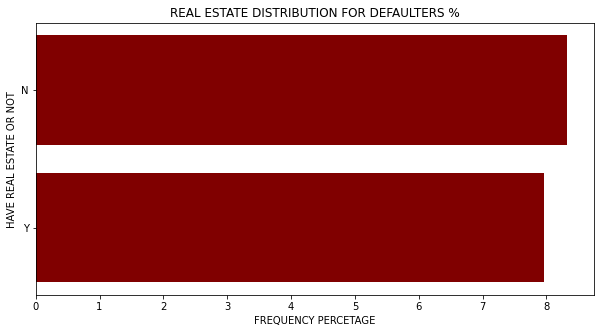

Y = 7.961726705046225%
N = 8.324929139375152%


In [27]:
name=train[train['TARGET']==1].FLAG_OWN_REALTY.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==1].FLAG_OWN_REALTY
    val.append(temp[temp==i].value_counts()*100/train[train["FLAG_OWN_REALTY"]==i].FLAG_OWN_REALTY.value_counts())
val=[i[0] for i in val]
fig = plt.figure(figsize = (10, 5))
plt.barh(name, val, color ='maroon')
plt.title("REAL ESTATE DISTRIBUTION FOR DEFAULTERS %")
plt.xlabel("FREQUENCY PERCETAGE")
plt.ylabel("HAVE REAL ESTATE OR NOT")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

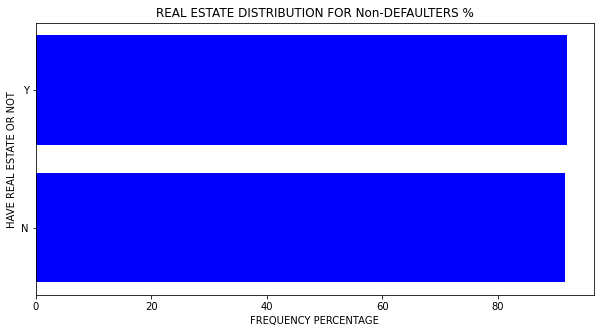

N = 91.67507086062484%
Y = 92.03827329495378%


In [28]:
name=train[train['TARGET']==0].FLAG_OWN_REALTY.unique()
val=[]
for i in name:
    temp=train[train['TARGET']==0].FLAG_OWN_REALTY
    val.append(temp[temp==i].value_counts()*100/train[train["FLAG_OWN_REALTY"]==i].FLAG_OWN_REALTY.value_counts())
val=[i[0] for i in val]
fig = plt.figure(figsize = (10, 5))
plt.barh(name, val, color ='blue')
plt.title("REAL ESTATE DISTRIBUTION FOR Non-DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("HAVE REAL ESTATE OR NOT")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

Observation:
- It is observed that people with more real estate take more loan.

- It is also observed that people with no realestate have a more difficult time repaying their loan as compared to those with realestate


# **Bureau.csv**

 Contains all the loan history of applicants that they may have. Here, an applicant may have more than one row depending upon their past loan history. The common row to connect this with our main sample is the SK_ID_CURR. This information has been taken from credit bureau which is a data collecting agency and sells information to money lending organization/business. 

In [ ]:
bureau = pd.read_csv('bureau.csv')
print(bureau.shape)

(1716428, 17)


In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


we see that in total there are 17 columns. The common attribute or column which it shares with the train data set is the SK_ID_CURR. each entries in the train could have multiple entries in the bureau head. We shall right now only merge the target column to see for some columns which match and help in identifying the target values better.
Because there are multiple entries for same ID. we first take the mean so that we dont have any repeaties.


In [ ]:
bureau1 = bureau.groupby('SK_ID_CURR').mean()

We now add the target column from train1 for each of its respective ids

In [ ]:
temp=train[["SK_ID_CURR","TARGET"]]
bureau2 = temp.merge(bureau1, on = 'SK_ID_CURR', how = 'left')

In [ ]:
bureau2.head()

,SK_ID_CURR,TARGET,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100002,1,6153272.125,-874.00,0.0,-349.0,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0
1,100003,0,5885878.500,-1400.75,0.0,-544.5,-1097.333333,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN
2,100004,0,6829133.500,-867.00,0.0,-488.5,-532.500000,0.000,0.0,94518.900000,0.0,0.00000,0.0,-532.000,NaN
3,100006,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,5987200.000,-1149.00,0.0,-783.0,-783.000000,0.000,0.0,146250.000000,0.0,0.00000,0.0,-783.000,NaN


**DAYS CREDIT**

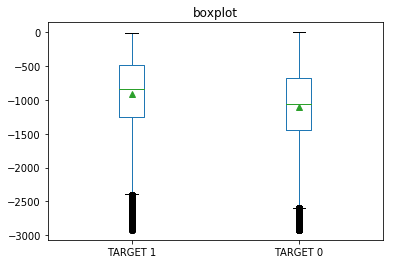

In [ ]:
from scipy.stats import norm

x1=bureau2[bureau2['TARGET']==1].DAYS_CREDIT
x2=bureau2[bureau2['TARGET']==0].DAYS_CREDIT
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

Observation:
- The days credit is the no of days from the day the application was given to current day.
- It is observed that the no of days are less for clients who fail to repay their loan on time compared to those who pay on time


**DAYS CREDIT END DATE**

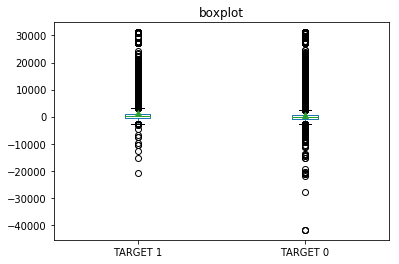

In [ ]:
from scipy.stats import norm

x1=bureau2[bureau2['TARGET']==1].DAYS_CREDIT_ENDDATE
x2=bureau2[bureau2['TARGET']==0].DAYS_CREDIT_ENDDATE
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

In [ ]:
DF.quantile([.0, .1, .25, .5, .75, 1], axis = 0)

,TARGET 1,TARGET 0
0.00,-20769.000000,-41875.000000
0.10,-1020.977778,-1211.142857
0.25,-474.750000,-719.000000
0.50,94.716667,-156.000000
0.75,923.750000,574.000000
1.00,31198.000000,31198.000000


Observation
- On printing the quarantile and the boxplot we can see that there are days which when converted to years are above or close to 100. As its to big to be true we can remove these as it might be outliers

**DAYS ENDDATE**

These numbers tell us about the time after which the credit beaure's credit had ended till the time the application of client has been checked

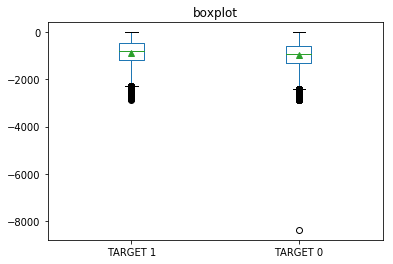

In [ ]:
from scipy.stats import norm

x1=bureau2[bureau2['TARGET']==1].DAYS_ENDDATE_FACT
x2=bureau2[bureau2['TARGET']==0].DAYS_ENDDATE_FACT
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

In [ ]:
DF.quantile([.0, .1, .25, .5, .75, 1], axis = 0)

,TARGET 1,TARGET 0
0.00,-2852.000000,-8376.500000
0.10,-1583.000000,-1684.500000
0.25,-1190.000000,-1303.854396
0.50,-806.000000,-937.200000
0.75,-455.666667,-582.666667
1.00,0.000000,0.000000


Observation
- we can see that the people who arent able to pay their loans on time have a lesser no. of days since the credit beaure had ended their credit compared to the ones who were able to repay their loan on time

# **Bureau_BALANCE.CSV**

Contains month wise balance of previous credits one may have. For each month we have a separate entry 

In [ ]:
bureau_balance = pd.read_csv('bureau_BALANCE.csv')
print(bureau_balance.shape)

(27299925, 3)


In [ ]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
bureau_balance['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [ ]:
bureau_balance.quantile([.0, .1, .25, .5, .75, 1], axis = 0)

,SK_ID_BUREAU,MONTHS_BALANCE
0.00,5001709.0,-96.0
0.10,5262433.0,-68.0
0.25,5730933.0,-46.0
0.50,6070821.0,-25.0
0.75,6431951.0,-11.0
1.00,6842888.0,0.0


- bureau balance is the past record of the clients with other loan companies
- We see that the bureau balance has 3 columns which majorly contain the months balance and the status
- a client may have multiple rows as each row represents one month.
- The maximum month of a client given is of 96 months which is 8 years of past history.
- In status there are 8 types of values in which x means unknown, c means complete and number 0-5 indicate the payemnt due the client has made in which 0 means no due to 5 meaning maximum due possible.


# **Previous Application.CSV**

Previous application contain information about the clients who had loans with home credit before too

In [29]:
downloaded = drive.CreateFile({'id':'1SkflEl6dAPwt6hRAlYs7C1_4z5j0tcuH'})# replace the id with id of file you want to access
downloaded.GetContentFile('previous_application.csv')

In [30]:
previous_application = pd.read_csv('previous_application.csv')
print(previous_application.shape)

(1670214, 37)


In [31]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


As each client can have multiple previous loans we shall take mean of same curr ids to get one entry

In [32]:
temp=train[["SK_ID_CURR","TARGET"]]
previous_application_1 = temp.merge(previous_application, on = 'SK_ID_CURR', how = 'left')

In [33]:
previous_application_1.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


**Name Contract Status**

This tells us about the status of what happened the last time the client had applied for loan at home credit

In [34]:
x=[]
for i in previous_application_1['NAME_CONTRACT_STATUS'].unique():
    if not(pd.isna(i)):
        x.append(i)

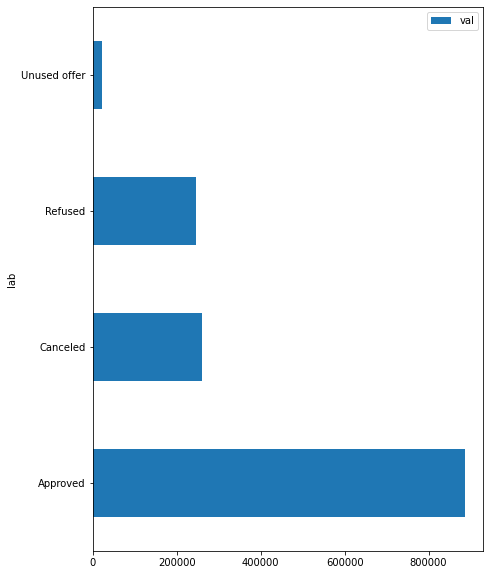

In [35]:
df = pd.DataFrame({'lab':x, 'val':previous_application_1['NAME_CONTRACT_STATUS'].value_counts()})
ax = df.plot.barh(x='lab', y='val', rot=0,figsize=(7,10))

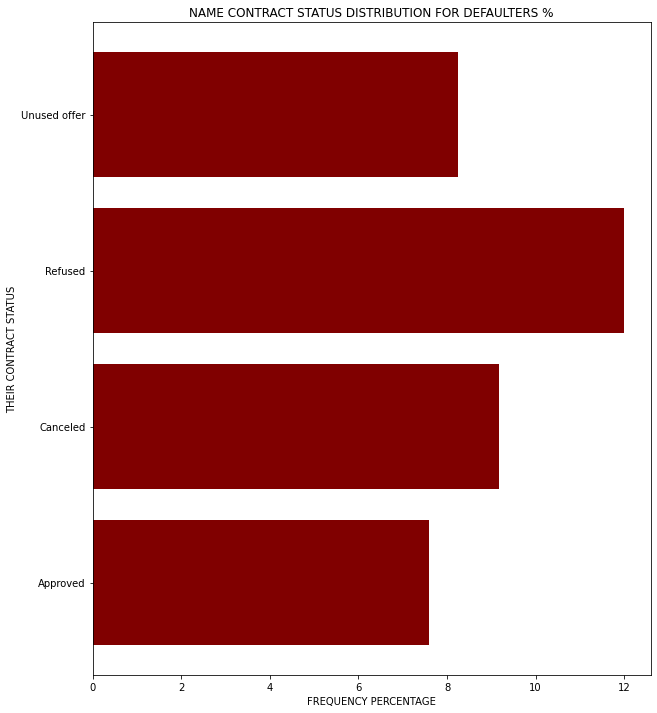

Approved = 7.5888524234941475%
Canceled = 9.173816847444822%
Refused = 11.99763617467854%
Unused offer = 8.25172368363269%


In [39]:
name=x
val=[]
for i in name:
    temp=previous_application_1[previous_application_1['TARGET']==1].NAME_CONTRACT_STATUS
    val.append(temp[temp==i].value_counts()*100/previous_application_1[previous_application_1["NAME_CONTRACT_STATUS"]==i].NAME_CONTRACT_STATUS.value_counts())
val=[i.values[0] for i in val]
fig = plt.figure(figsize = (10, 12))
plt.barh(name, val, color ='maroon')
plt.title("NAME CONTRACT STATUS DISTRIBUTION FOR DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("THEIR CONTRACT STATUS")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

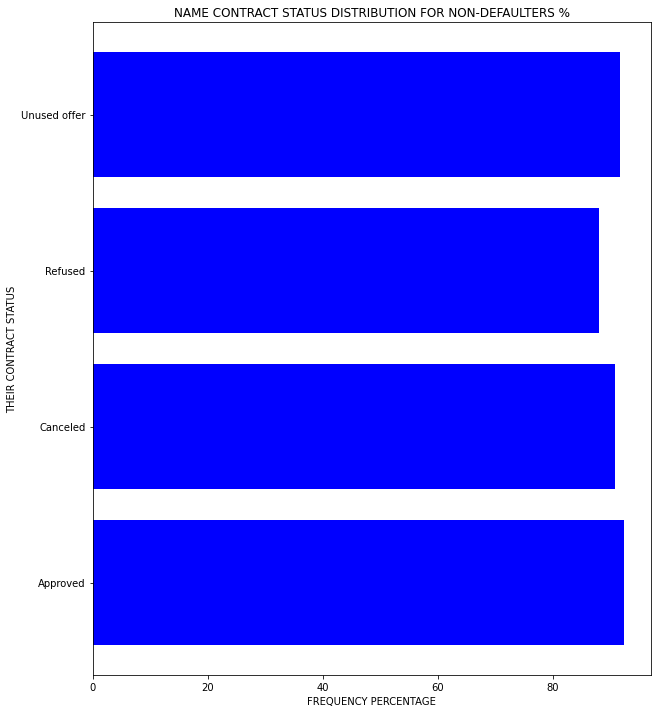

Approved = 92.41114757650585%
Canceled = 90.82618315255517%
Refused = 88.00236382532145%
Unused offer = 91.74827631636731%


In [38]:
name=x
val=[]
for i in name:
    temp=previous_application_1[previous_application_1['TARGET']==0].NAME_CONTRACT_STATUS
    val.append(temp[temp==i].value_counts()*100/previous_application_1[previous_application_1["NAME_CONTRACT_STATUS"]==i].NAME_CONTRACT_STATUS.value_counts())
val=[i.values[0] for i in val]
fig = plt.figure(figsize = (10, 12))
plt.barh(name, val, color ='blue')
plt.title("NAME CONTRACT STATUS DISTRIBUTION FOR NON-DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("THEIR CONTRACT STATUS")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

observation:
- We can see that majorly most of the loans were approved. Some were cancelled  and some were refused to be granted loans.
- We see that the maximum defaulters are in those case who were refused loan the first time followed by cancelled. The safest were the ones who were also approved for loan the first time

**Product Combination**

this feature is about the product combination of previous clients

In [ ]:
previous_application_1.PRODUCT_COMBINATION.unique()
x=[]
for i in previous_application_1['PRODUCT_COMBINATION'].unique():
    if not(pd.isna(i)):
        x.append(i)

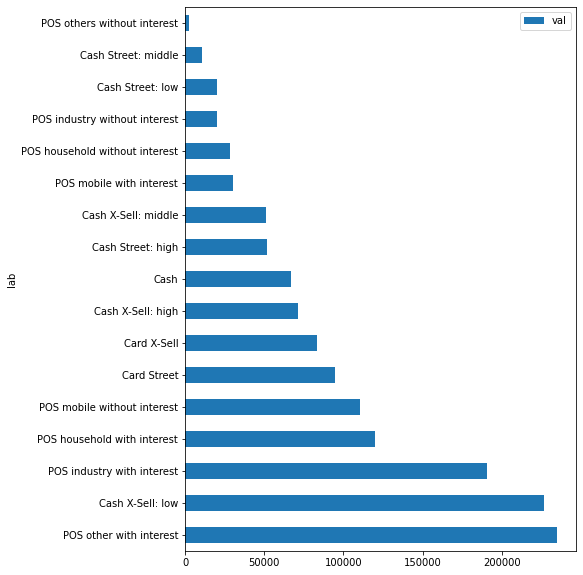

In [ ]:
df = pd.DataFrame({'lab':x, 'val':previous_application_1['PRODUCT_COMBINATION'].value_counts()})
ax = df.plot.barh(x='lab', y='val', rot=0,figsize=(7,10))

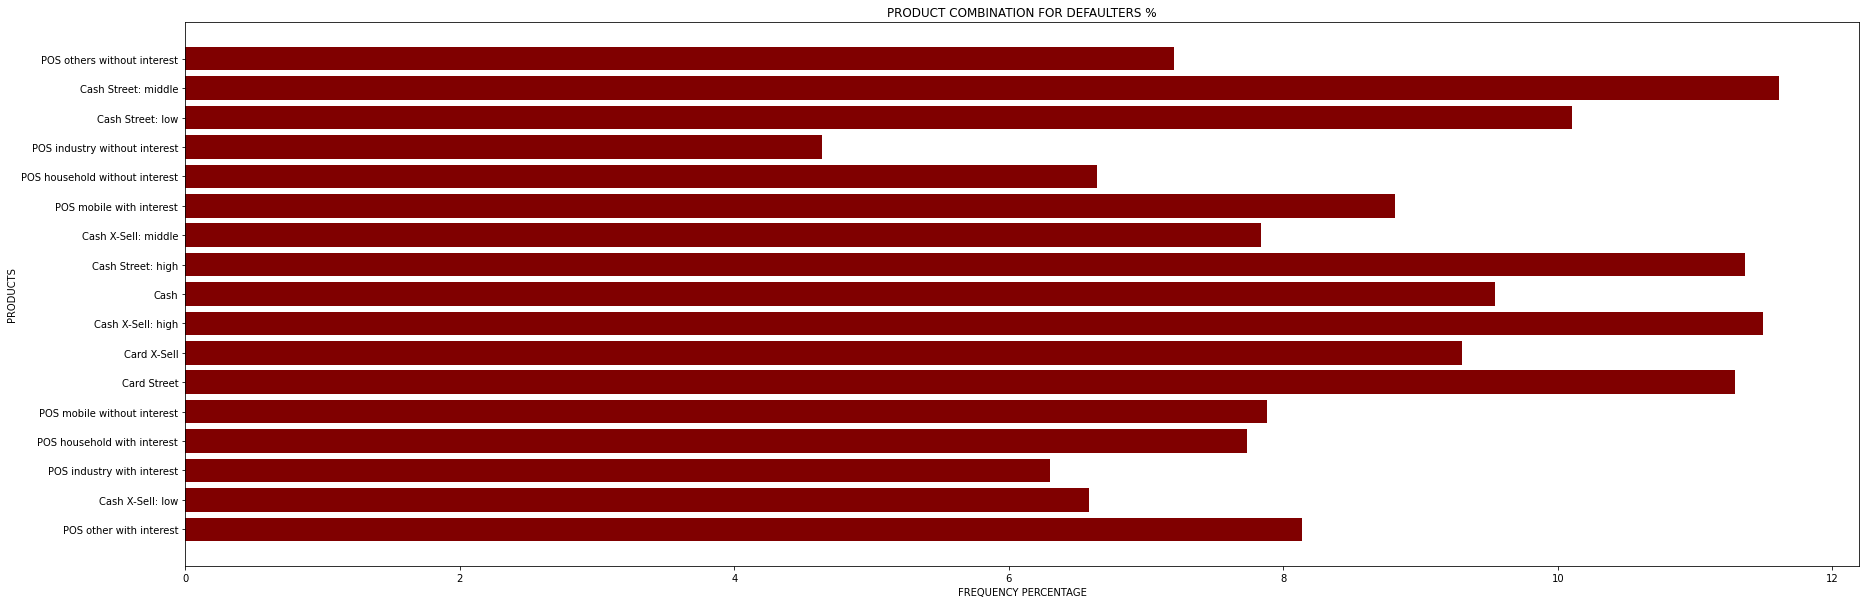

POS other with interest = 8.134324683637796%
Cash X-Sell: low = 6.583480265834803%
POS industry with interest = 6.302616609783845%
POS household with interest = 7.73473343960717%
POS mobile without interest = 7.883358471593766%
Card Street = 11.290834126228988%
Card X-Sell = 9.306052753770802%
Cash X-Sell: high = 11.49499960626821%
Cash = 9.54128986703191%
Cash Street: high = 11.36429580053001%
Cash X-Sell: middle = 7.836243668355105%
POS mobile with interest = 8.810999732761829%
POS household without interest = 6.640193515009997%
POS industry without interest = 4.641747481404765%
Cash Street: low = 10.100374217465813%
Cash Street: middle = 11.615554219282421%
POS others without interest = 7.20763723150358%


In [ ]:
name=x
val=[]
for i in name:
    temp=previous_application_1[previous_application_1['TARGET']==1].PRODUCT_COMBINATION
    val.append(temp[temp==i].value_counts()*100/previous_application_1[previous_application_1["PRODUCT_COMBINATION"]==i].PRODUCT_COMBINATION.value_counts())
val=[i.values[0] for i in val]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='maroon')
plt.title("PRODUCT COMBINATION FOR DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("PRODUCTS")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

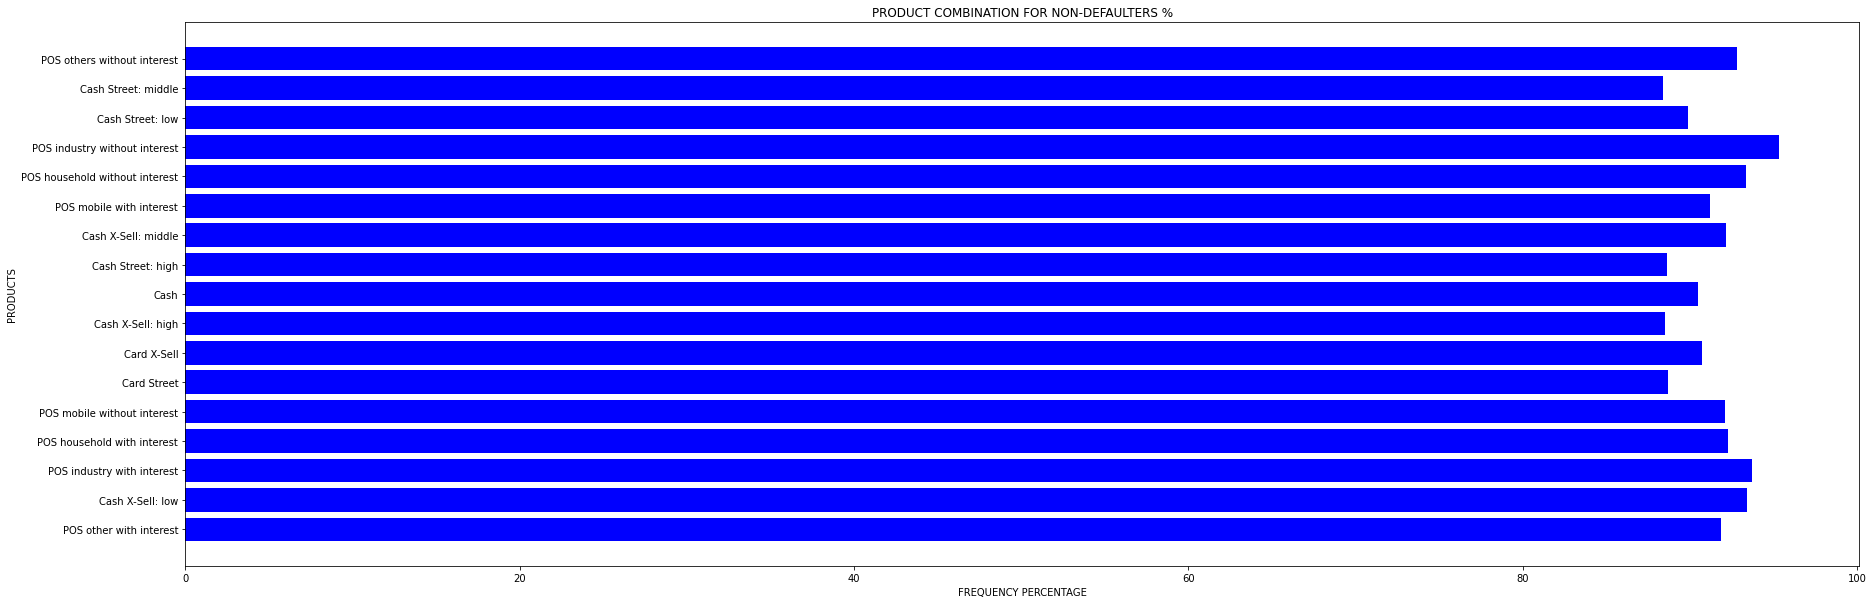

POS other with interest = 91.8656753163622%
Cash X-Sell: low = 93.41651973416519%
POS industry with interest = 93.69738339021616%
POS household with interest = 92.26526656039283%
POS mobile without interest = 92.11664152840623%
Card Street = 88.70916587377101%
Card X-Sell = 90.6939472462292%
Cash X-Sell: high = 88.50500039373179%
Cash = 90.4587101329681%
Cash Street: high = 88.63570419946998%
Cash X-Sell: middle = 92.16375633164489%
POS mobile with interest = 91.18900026723817%
POS household without interest = 93.35980648499%
POS industry without interest = 95.35825251859524%
Cash Street: low = 89.89962578253419%
Cash Street: middle = 88.38444578071758%
POS others without interest = 92.79236276849642%


In [ ]:
name=x
val=[]
for i in name:
    temp=previous_application_1[previous_application_1['TARGET']==0].PRODUCT_COMBINATION
    val.append(temp[temp==i].value_counts()*100/previous_application_1[previous_application_1["PRODUCT_COMBINATION"]==i].PRODUCT_COMBINATION.value_counts())
val=[i.values[0] for i in val]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='blue')
plt.title("PRODUCT COMBINATION FOR NON-DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("PRODUCTS")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

Observation
- We see the highest borrowers are with comination of POS other with interest 
- The case where people are not able to repay their loans are from the category cash street :middle,cash_X-sell:_middle
- The safest are the ones from POS_industry_without_interest

**CODE_Reject_Reason**

Reason to reject the loan application last time

In [ ]:
previous_application_1.CODE_REJECT_REASON.unique()
x=[]
for i in previous_application_1['CODE_REJECT_REASON'].unique():
    if not(pd.isna(i)):
        x.append(i)

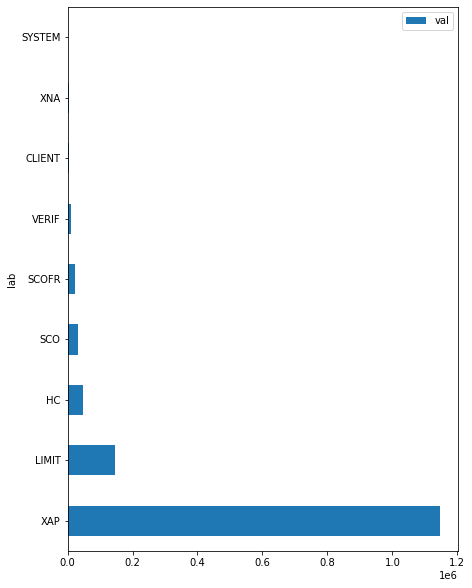

In [ ]:
df = pd.DataFrame({'lab':x, 'val':previous_application_1['CODE_REJECT_REASON'].value_counts()})
ax = df.plot.barh(x='lab', y='val', rot=0,figsize=(7,10))

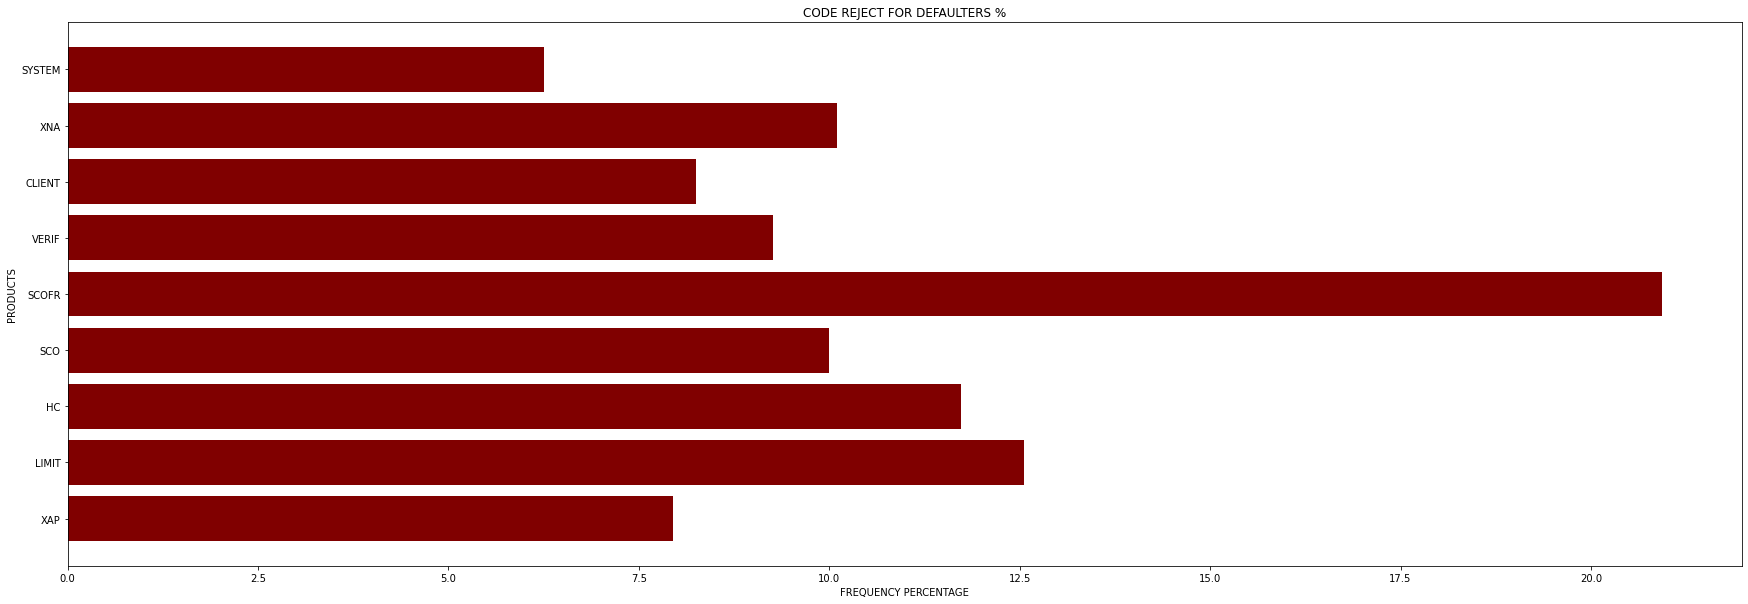

XAP = 7.947862205511465%
LIMIT = 12.559921291159908%
HC = 11.73560966252415%
SCO = 9.999080685195967%
SCOFR = 20.930660290601434%
VERIF = 9.256252029879832%
CLIENT = 8.25172368363269%
XNA = 10.098240804203792%
SYSTEM = 6.25%


In [ ]:
name=x
val=[]
for i in name:
    temp=previous_application_1[previous_application_1['TARGET']==1].CODE_REJECT_REASON
    val.append(temp[temp==i].value_counts()*100/previous_application_1[previous_application_1["CODE_REJECT_REASON"]==i].CODE_REJECT_REASON.value_counts())
val=[i.values[0] for i in val]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='maroon')
plt.title("CODE REJECT FOR DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("PRODUCTS")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

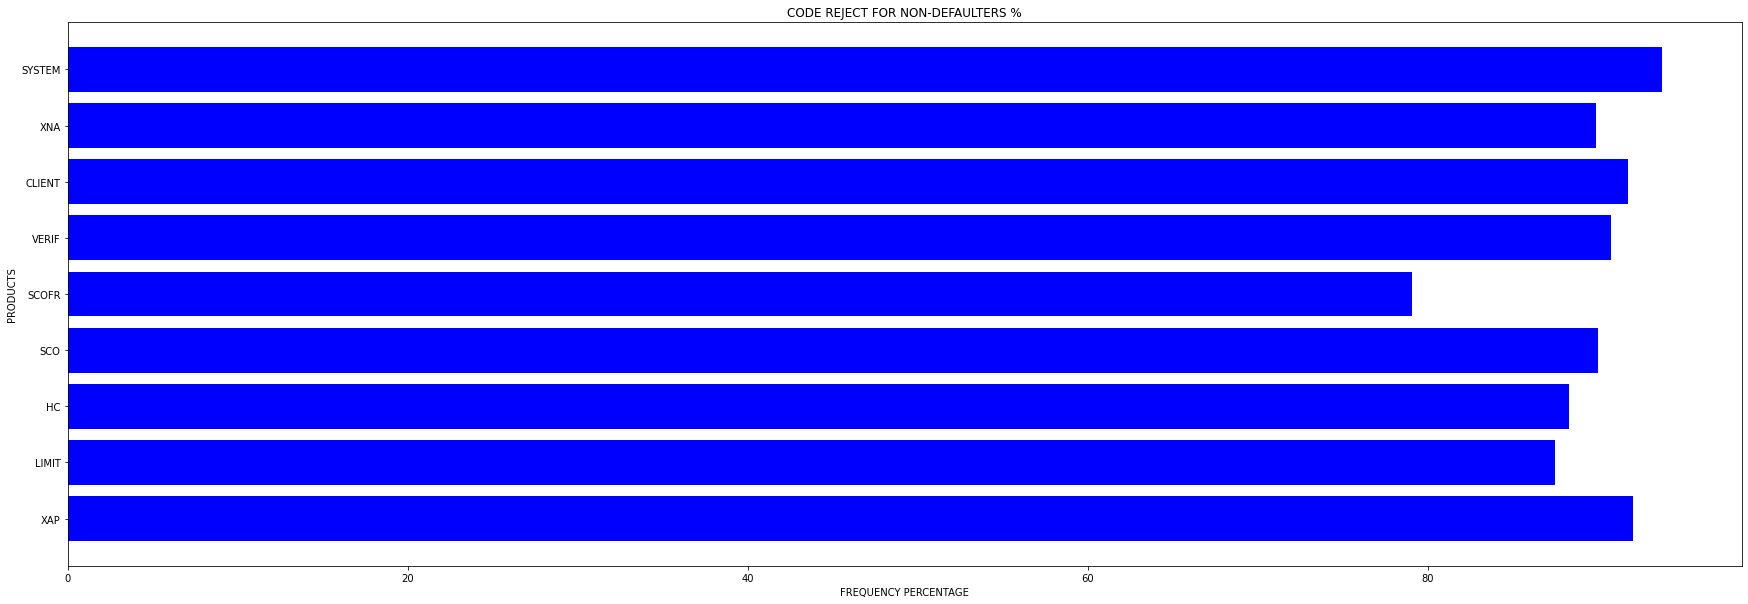

XAP = 92.05213779448853%
LIMIT = 87.44007870884009%
HC = 88.26439033747585%
SCO = 90.00091931480404%
SCOFR = 79.06933970939856%
VERIF = 90.74374797012017%
CLIENT = 91.74827631636731%
XNA = 89.9017591957962%
SYSTEM = 93.75%


In [ ]:
name=x
val=[]
for i in name:
    temp=previous_application_1[previous_application_1['TARGET']==0].CODE_REJECT_REASON
    val.append(temp[temp==i].value_counts()*100/previous_application_1[previous_application_1["CODE_REJECT_REASON"]==i].CODE_REJECT_REASON.value_counts())
val=[i.values[0] for i in val]
fig = plt.figure(figsize = (30, 10))
plt.barh(name, val, color ='blue')
plt.title("CODE REJECT FOR NON-DEFAULTERS %")
plt.xlabel("FREQUENCY PERCENTAGE")
plt.ylabel("PRODUCTS")
plt.show()
for i in range(len(name)):
  print(str(name[i])+" = "+str(val[i])+"%")

Observation:
- We see that the category rejected the most is XAP
- For the defaulters case we see its SCOFR category which has the highest case of non repayment of loans. and XAP is one of the lowest after System.

**CNT PAYMENT**

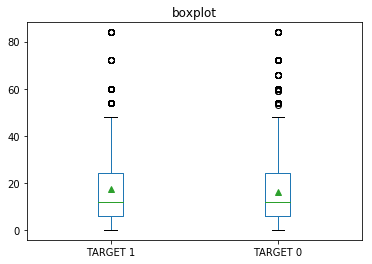

In [ ]:
from scipy.stats import norm

x1=previous_application_1[previous_application_1['TARGET']==1].CNT_PAYMENT
x2=previous_application_1[previous_application_1['TARGET']==0].CNT_PAYMENT
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

In [ ]:
DF.quantile([.0, .1, .25, .5, .75, 1], axis = 0)

,TARGET 1,TARGET 0
0.00,0.0,0.0
0.10,0.0,0.0
0.25,6.0,6.0
0.50,12.0,12.0
0.75,24.0,24.0
1.00,84.0,84.0


Observation
- This has almost same values for both the defaulters as well as the non defaulters are doesnt provide much information

**DAYS Decision**

This feature tells us about the days taken to make the decision for the previous application

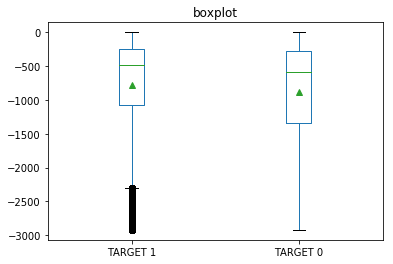

In [ ]:
from scipy.stats import norm

x1=previous_application_1[previous_application_1['TARGET']==1].DAYS_DECISION
x2=previous_application_1[previous_application_1['TARGET']==0].DAYS_DECISION
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

In [ ]:
DF.quantile([.0, .1, .25, .5, .75, 1], axis = 0)

,TARGET 1,TARGET 0
0.00,-2922.0,-2922.0
0.10,-2052.0,-2271.0
0.25,-1072.0,-1336.0
0.50,-491.0,-593.0
0.75,-250.0,-273.0
1.00,-2.0,-1.0


Observation
- we see that the no of days for the clients unable to pay the loan on time is less compared to the ones who were able to successfully pay the loan. Thus the decision taken for defaults was earlier than those compared to non defaulters

# **INSTALMENT PAYMENT**

This table has the history of the loan payemtns of each client that were previously associated with this orginaziation

In [ ]:
instalment_payment = pd.read_csv('installments_payments.csv')
print(instalment_payment.shape)

(13605401, 8)


In [ ]:
instalment_payment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


Merging the payment with train to get the target column

In [ ]:
x=train[["SK_ID_CURR","TARGET"]]
instalment_payment_1 = x.merge(instalment_payment, on = 'SK_ID_CURR', how = 'left')

In [ ]:
instalment_payment_1.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775


We see that one id can have multiple entries. As all the entries are in numeric value we take the mean so as to get single entries for each and not multiple entries

In [ ]:
instalment_payment_1= instalment_payment_1.groupby('SK_ID_CURR').mean()

**DAYS INSTALLMENT**

Shows the no of days for the instalment to be paid

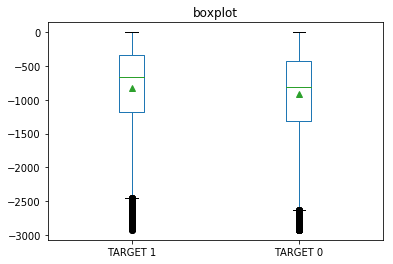

In [ ]:
from scipy.stats import norm

x1=instalment_payment_1[instalment_payment_1['TARGET']==1].DAYS_INSTALMENT
x2=instalment_payment_1[instalment_payment_1['TARGET']==0].DAYS_INSTALMENT
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

Observation
- We see that the mean for the defaulters is lower compared to the ones for non defaulters. i.e. the day to be paid is less for the defaulter compared to the non defaulters

**day entry paymentt**

shows the day when the payment was actually made

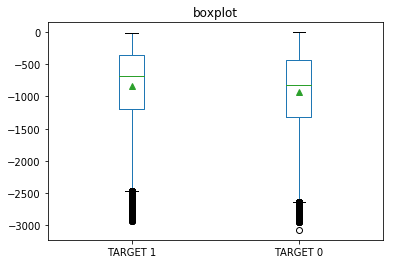

In [ ]:
from scipy.stats import norm

x1=instalment_payment_1[instalment_payment_1['TARGET']==1].DAYS_ENTRY_PAYMENT
x2=instalment_payment_1[instalment_payment_1['TARGET']==0].DAYS_ENTRY_PAYMENT
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

Observation:
- This shows similar attribute to DAYS INSTALMENT.
- As the defaulters take longer time to pay their gap is also shorter compared to the non defaulters

In [ ]:
instalment_payment.DAYS_ENTRY_PAYMENT.head()

0   -1187.0
1   -2156.0
2     -63.0
3   -2426.0
4   -1366.0
Name: DAYS_ENTRY_PAYMENT, dtype: float64

# **POS_CASH_BALANCE.CSV**

 Contains each client’s information which has been associated with home credit before regarding their point of sales and cash loans. This row contains 8 features. 

In [ ]:
pos_cash_balance = pd.read_csv('POS_CASH_BALANCE.csv')
print(pos_cash_balance.shape)

(10001358, 8)


In [ ]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
pos_cash_balance_1= pos_cash_balance.groupby('SK_ID_CURR').mean()

In [ ]:
pos_cash_balance_1.shape

(337252, 6)

In [ ]:
pos_cash_balance_1.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_CURR,,,,,,
100001,1.584045e+06,-72.555556,4.000000,1.444444,0.777778,0.777778
100002,1.038818e+06,-10.000000,24.000000,15.000000,0.000000,0.000000
100003,2.297665e+06,-43.785714,10.107143,5.785714,0.000000,0.000000
100004,1.564014e+06,-25.500000,3.750000,2.250000,0.000000,0.000000
100005,2.495675e+06,-20.000000,11.700000,7.200000,0.000000,0.000000


In [ ]:
pos_cash_balance_1["SK_ID_CURR"]=pos_cash_balance_1.index
pos_cash_balance_1.reset_index(drop=True, inplace=True)


In [ ]:
pos_cash_balance_1.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1.584045e+06,-72.555556,4.000000,1.444444,0.777778,0.777778,100001
1,1.038818e+06,-10.000000,24.000000,15.000000,0.000000,0.000000,100002
2,2.297665e+06,-43.785714,10.107143,5.785714,0.000000,0.000000,100003
3,1.564014e+06,-25.500000,3.750000,2.250000,0.000000,0.000000,100004
4,2.495675e+06,-20.000000,11.700000,7.200000,0.000000,0.000000,100005


In [ ]:
temp=train[["SK_ID_CURR","TARGET"]]
pos_cash_balance_1 = temp.merge(pos_cash_balance_1, on = 'SK_ID_CURR', how = 'left')

In [ ]:
pos_cash_balance_1.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
0,100002,1,1.038818e+06,-10.000000,24.000000,15.000000,0.0,0.0
1,100003,0,2.297665e+06,-43.785714,10.107143,5.785714,0.0,0.0
2,100004,0,1.564014e+06,-25.500000,3.750000,2.250000,0.0,0.0
3,100006,0,2.215853e+06,-9.619048,12.000000,8.650000,0.0,0.0
4,100007,0,2.041993e+06,-33.636364,15.333333,8.969697,0.0,0.0


This feature tells us about each months balance in the clients account.

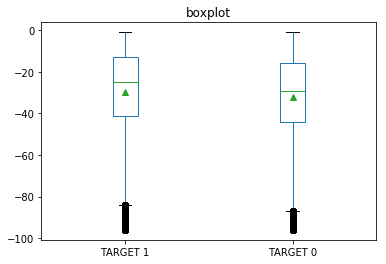

In [ ]:
from scipy.stats import norm

x1=pos_cash_balance_1[pos_cash_balance_1['TARGET']==1].MONTHS_BALANCE
x2=pos_cash_balance_1[pos_cash_balance_1['TARGET']==0].MONTHS_BALANCE
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

Observation:
- We can see that month's balance for the non defaulters are usually more than those compared to defaulters

This feature tells us about The number of instalments they have made till now

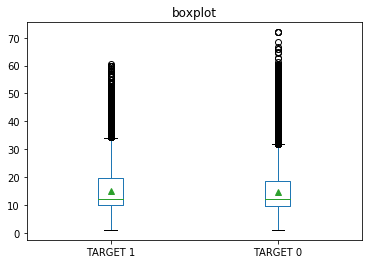

In [ ]:
from scipy.stats import norm

x1=pos_cash_balance_1[pos_cash_balance_1['TARGET']==1].CNT_INSTALMENT
x2=pos_cash_balance_1[pos_cash_balance_1['TARGET']==0].CNT_INSTALMENT
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

In [ ]:
DF.quantile([.0, .1, .25, .5, .75, 1], axis = 0)

,TARGET 1,TARGET 0
0.00,1.000000,1.000000
0.10,6.000000,6.000000
0.25,9.799074,9.600000
0.50,12.000000,12.000000
0.75,19.565217,18.482759
1.00,60.709677,72.000000


Obervation:
- We can see there is not much of a difference between the two compared to the end where the instalment for the defaulters where its low

This feature tells us about the number of installments already made by the clients

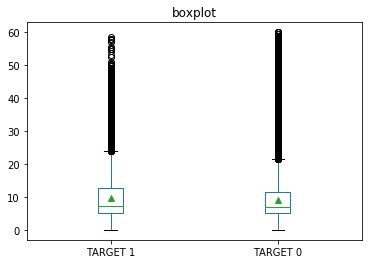

In [ ]:
from scipy.stats import norm

x1=pos_cash_balance_1[pos_cash_balance_1['TARGET']==1].CNT_INSTALMENT_FUTURE
x2=pos_cash_balance_1[pos_cash_balance_1['TARGET']==0].CNT_INSTALMENT_FUTURE
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

In [ ]:
DF.quantile([.0, .1, .25, .5, .75, 1], axis = 0)

,TARGET 1,TARGET 0
0.00,0.000000,0.000000
0.10,3.166667,3.272727
0.25,5.000000,5.000000
0.50,7.200000,6.922577
0.75,12.628188,11.586207
1.00,58.500000,60.000000


Observation:
We see a similarity in cnt_installment and cnt_installment_future. We can see that the defualters have more number of installments left compared to the non defaulters

# **Credit_Card_balance.CSV**

Has 23 columns and contains information about the previous credit history with home credit

In [ ]:
credit_card_balance = pd.read_csv('credit_card_balance.csv')
print(credit_card_balance.shape)

(3840312, 23)


In [ ]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
credit_card_balance_1= credit_card_balance.groupby('SK_ID_CURR').mean()
credit_card_balance_1.shape

(103558, 21)

In [ ]:
credit_card_balance_1.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,1489396.0,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
100011,1843384.0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.0,3956.221849,4843.064189,...,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.0,0.0,25.767123,0.000000,0.000000
100013,2038692.0,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.0,0.0,1454.539551,7168.346250,...,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.0,0.0,18.719101,0.010417,0.010417
100021,2594025.0,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
100023,1499902.0,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000


In [ ]:
credit_card_balance_1["SK_ID_CURR"]=credit_card_balance_1.index
credit_card_balance_1.reset_index(drop=True, inplace=True)
temp=train[["SK_ID_CURR","TARGET"]]
credit_card_balance_1= temp.merge(credit_card_balance_1, on = 'SK_ID_CURR', how = 'left')
print(credit_card_balance_1.head(5))

   SK_ID_CURR  TARGET  SK_ID_PREV  MONTHS_BALANCE  AMT_BALANCE  \
0      100002       1         NaN             NaN          NaN   
1      100003       0         NaN             NaN          NaN   
2      100004       0         NaN             NaN          NaN   
3      100006       0   1489396.0            -3.5          0.0   
4      100007       0         NaN             NaN          NaN   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                      NaN                       NaN                   NaN   
1                      NaN                       NaN                   NaN   
2                      NaN                       NaN                   NaN   
3                 270000.0                       NaN                   0.0   
4                      NaN                       NaN                   NaN   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  ...  \
0                         NaN                       NaN  ...   
1     

This feature  tells us about the amount left to be paid for the defaultes

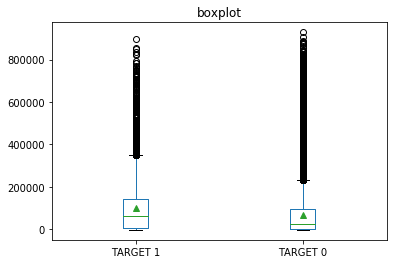

In [ ]:
from scipy.stats import norm

x1=credit_card_balance_1[pos_cash_balance_1['TARGET']==1].AMT_BALANCE
x2=credit_card_balance_1[pos_cash_balance_1['TARGET']==0].AMT_BALANCE
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

This feature tells us about the amount still to be recieved from the clients

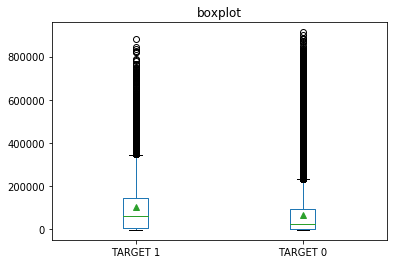

In [ ]:
from scipy.stats import norm

x1=credit_card_balance_1[pos_cash_balance_1['TARGET']==1].AMT_RECIVABLE
x2=credit_card_balance_1[pos_cash_balance_1['TARGET']==0].AMT_RECIVABLE
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

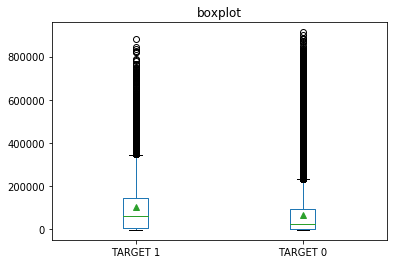

In [ ]:
from scipy.stats import norm

x1=credit_card_balance_1[pos_cash_balance_1['TARGET']==1].AMT_TOTAL_RECEIVABLE
x2=credit_card_balance_1[pos_cash_balance_1['TARGET']==0].AMT_TOTAL_RECEIVABLE
DF = pd.DataFrame({'TARGET 1': x1, 'TARGET 0': x2})

ax = DF[['TARGET 1', 'TARGET 0']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

Observation:
We see a trend among the three variables stating that the amount paid by the defaulters is less compared to the non defaulters and the amount still remaining to be paid is also more by the defaulters

# **OBSERVATION**

After the EDA of all the datasets provided to us we can observe that:
- The dataset is imbalanced.
- Many features contain Nan or XNA value. For Nan values we would have to take mean of the feature or use a simple model like KNN to fill the missing section. Features with too many missing values could be removed decreasing the dimensionality of our model.
- There are some wrong entries in the features which need to be removed.
- There are also some values which are outdated and should be removed as it wont be contributing in the model in anyway
- There are also some features which have same type of inputs in it and are just increasing the dimensionality and could be removed too. 
- There would be some features which might not contribute too much for the model and could be removed too with the help of coorelation with the target.
- Not all sorts of outliers could be removed as some of them may really be adding some value to the model. 
- There are some features which provide really good insight in discriminating the defaulters from the non defaulters

Keeping all this in mind we could proceed with the preprocessing of the data

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns

# **PREPROCESSING**

The adjustments we apply to our data before feeding it to the algorithm are referred to as pre-processing. Data preprocessing is a method for converting unclean data into a clean data set. In other words, anytime data is received from various sources, it is collected in raw format, which makes analysis impossible.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1R4_biFY4l4jwmaMMzOh5cgB1nB6Eb1z1'}) # replace the id with id of file you want to access
downloaded.GetContentFile('application_train.csv') 


In [ ]:
downloaded = drive.CreateFile({'id':'1ni9rz70QVjmB026wuY2qgjbgw-MV3EAr'}) # replace the id with id of file you want to access
downloaded.GetContentFile('application_test.csv') 


# **TRAIN.CSV AND TEST.CSV**

We have already seen some abnormalities in some of the features while doing the EDA so we shall solve all of those first

In [ ]:
train = pd.read_csv('application_train.csv')
print(train.shape)
test=pd.read_csv("application_test.csv")
print(test.shape)

(307511, 122)
(48744, 121)


In [ ]:
print(train.CODE_GENDER.value_counts())
index = train[ train['CODE_GENDER'] == "XNA" ].index
train.drop(index , inplace=True)


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


In [ ]:
test.CODE_GENDER.value_counts()

F    32678
M    16066
Name: CODE_GENDER, dtype: int64

Dropped the XNA rows for code gender in train as there were only 4 in total

In [ ]:
train.DAYS_EMPLOYED.quantile([.0, .1, .25, .5, .75, 1])
train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

0.00    -17912.0
0.10     -4881.0
0.25     -2760.0
0.50     -1213.0
0.75      -289.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
test.DAYS_EMPLOYED.quantile([.0, .1, .25, .5, .75, 1])

0.00    -17463.0
0.10     -4929.8
0.25     -2910.0
0.50     -1293.0
0.75      -296.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
test['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

In [ ]:
print("train")
print(train.DAYS_EMPLOYED.quantile([.0, .1, .25, .5, .75, 1]))
print("="*50)
print("test")
print(test.DAYS_EMPLOYED.quantile([.0, .1, .25, .5, .75, 1]))

train
0.00    -17912.0
0.10     -4881.0
0.25     -2760.0
0.50     -1213.0
0.75      -289.0
1.00    365243.0
Name: DAYS_EMPLOYED, dtype: float64
test
0.00   -17463.00
0.10    -5410.00
0.25    -3328.75
0.50    -1765.00
0.75     -861.00
1.00       -1.00
Name: DAYS_EMPLOYED, dtype: float64


Replaced the number of days 365243 with np.nan as its practically impossible for someone to be employed for this long

In [ ]:
train=train.drop("FLAG_DOCUMENT_2",1)
test=test.drop("FLAG_DOCUMENT_2",1)

train=train.drop("FLAG_DOCUMENT_4",1)
test=test.drop("FLAG_DOCUMENT_4",1)

train=train.drop("FLAG_DOCUMENT_7",1)
test=test.drop("FLAG_DOCUMENT_7",1)

train=train.drop("FLAG_DOCUMENT_10",1)
test=test.drop("FLAG_DOCUMENT_10",1)

train=train.drop("FLAG_DOCUMENT_10",1)
test=test.drop("FLAG_DOCUMENT_10",1)

train=train.drop("FLAG_DOCUMENT_12",1)
test=test.drop("FLAG_DOCUMENT_12",1)

train=train.drop("FLAG_DOCUMENT_17",1)
test=test.drop("FLAG_DOCUMENT_17",1)

train=train.drop("FLAG_DOCUMENT_19",1)
test=test.drop("FLAG_DOCUMENT_19",1)

train=train.drop("FLAG_DOCUMENT_20",1)
test=test.drop("FLAG_DOCUMENT_20",1)

0    307494
1        13
Name: FLAG_DOCUMENT_2, dtype: int64


In [ ]:

print(train.FLAG_DOCUMENT_4.value_counts())
train=train.drop("FLAG_DOCUMENT_4",1)
test=test.drop("FLAG_DOCUMENT_4",1)

0    307482
1        25
Name: FLAG_DOCUMENT_4, dtype: int64


In [ ]:
print(train[train["FLAG_DOCUMENT_7"]==1].TARGET.value_counts())
print(train.FLAG_DOCUMENT_7.value_counts())
train=train.drop("FLAG_DOCUMENT_7",1)
test=test.drop("FLAG_DOCUMENT_7",1)

0    56
1     3
Name: TARGET, dtype: int64
0    307448
1        59
Name: FLAG_DOCUMENT_7, dtype: int64


In [ ]:

print(train.FLAG_DOCUMENT_10.value_counts())
train=train.drop("FLAG_DOCUMENT_10",1)
test=test.drop("FLAG_DOCUMENT_10",1)

0    307500
1         7
Name: FLAG_DOCUMENT_10, dtype: int64


In [ ]:

print(train.FLAG_DOCUMENT_10.value_counts())
train=train.drop("FLAG_DOCUMENT_10",1)
test=test.drop("FLAG_DOCUMENT_10",1)
print(train.FLAG_DOCUMENT_12.value_counts())
train=train.drop("FLAG_DOCUMENT_12",1)
test=test.drop("FLAG_DOCUMENT_12",1)

0    307505
1         2
Name: FLAG_DOCUMENT_12, dtype: int64


In [ ]:

print(train.FLAG_DOCUMENT_10.value_counts())
train=train.drop("FLAG_DOCUMENT_10",1)
test=test.drop("FLAG_DOCUMENT_10",1)
print(train.FLAG_DOCUMENT_12.value_counts())
train=train.drop("FLAG_DOCUMENT_12",1)
test=test.drop("FLAG_DOCUMENT_12",1)
print(train.FLAG_DOCUMENT_17.value_counts())
train=train.drop("FLAG_DOCUMENT_17",1)
test=test.drop("FLAG_DOCUMENT_17",1)

0    307425
1        82
Name: FLAG_DOCUMENT_17, dtype: int64


In [ ]:

print(train.FLAG_DOCUMENT_10.value_counts())
train=train.drop("FLAG_DOCUMENT_10",1)
test=test.drop("FLAG_DOCUMENT_10",1)
print(train.FLAG_DOCUMENT_12.value_counts())
train=train.drop("FLAG_DOCUMENT_12",1)
test=test.drop("FLAG_DOCUMENT_12",1)
print(train.FLAG_DOCUMENT_17.value_counts())
train=train.drop("FLAG_DOCUMENT_17",1)
test=test.drop("FLAG_DOCUMENT_17",1)
print(train.FLAG_DOCUMENT_19.value_counts())
train=train.drop("FLAG_DOCUMENT_19",1)
test=test.drop("FLAG_DOCUMENT_19",1)

0    307324
1       183
Name: FLAG_DOCUMENT_19, dtype: int64


In [ ]:

print(train.FLAG_DOCUMENT_10.value_counts())
train=train.drop("FLAG_DOCUMENT_10",1)
test=test.drop("FLAG_DOCUMENT_10",1)
print(train.FLAG_DOCUMENT_12.value_counts())
train=train.drop("FLAG_DOCUMENT_12",1)
test=test.drop("FLAG_DOCUMENT_12",1)
print(train.FLAG_DOCUMENT_17.value_counts())
train=train.drop("FLAG_DOCUMENT_17",1)
test=test.drop("FLAG_DOCUMENT_17",1)
print(train.FLAG_DOCUMENT_19.value_counts())
train=train.drop("FLAG_DOCUMENT_19",1)
test=test.drop("FLAG_DOCUMENT_19",1)
print(train.FLAG_DOCUMENT_20.value_counts())
train=train.drop("FLAG_DOCUMENT_20",1)
test=test.drop("FLAG_DOCUMENT_20",1)

0    307351
1       156
Name: FLAG_DOCUMENT_20, dtype: int64


In [ ]:
print(train.shape)
print(test.shape)

(307507, 114)
(48744, 113)


FEATURE ENGINEERING

REFERENCE:
https://www.gopaysense.com/blog/important-factors-personal-loan-applications/
https://www.businesstoday.in/latest/economy-politics/story/10-factors-banks-consider-before-approving-your-home-loan-78784-2017-05-08

Banks while lending loans will look into multiple things of the client such as their credit ratio, annual income, total work experience and so on before lending loans. These things play an important role and thus we shall add these in our dataset too as it might help getting better results

In [ ]:
train['annuity_income_percentage'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['car_to_birth_ratio'] = train['OWN_CAR_AGE'] / train['DAYS_BIRTH']
train['car_to_employ_ratio'] = train['OWN_CAR_AGE'] / train['DAYS_EMPLOYED']
train['children_ratio'] = train['CNT_CHILDREN'] / train['CNT_FAM_MEMBERS']
train['Annual_PAYMENT_Ratio'] = train['AMT_CREDIT'] / train['AMT_ANNUITY']
train['credit_to_goods_ratio'] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train['DEBT_TO_INCOME'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['EMPLOYMENT'] = train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']
train['INCOME_TO_CREDIT'] = train['AMT_INCOME_TOTAL'] / train['AMT_CREDIT']
train['AMT_CHILDREN'] = train['AMT_INCOME_TOTAL'] / (1 + train['CNT_CHILDREN'])
train['income_to_family'] = train['AMT_INCOME_TOTAL'] / train['CNT_FAM_MEMBERS']
train['Payment_credit'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train['phone_to_birth_ratio'] = train['DAYS_LAST_PHONE_CHANGE'] / train['DAYS_BIRTH']
train['phone_to_employ_ratio'] = train['DAYS_LAST_PHONE_CHANGE'] / train['DAYS_EMPLOYED']
installments_payments["Difference"]=installments_payments["AMT_INSTALMENT"]-installments_payments["AMT_PAYMENT"]
previous_application["Per_for_DP"]=previous_application["AMT_DOWN_PAYMENT"]/previous_application["AMT_CREDIT"]

test['annuity_income_percentage'] = test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']
test['car_to_birth_ratio'] = test['OWN_CAR_AGE'] / test['DAYS_BIRTH']
test['car_to_employ_ratio'] = test['OWN_CAR_AGE'] / test['DAYS_EMPLOYED']
test['children_ratio'] = test['CNT_CHILDREN'] / test['CNT_FAM_MEMBERS']
test['Annual_PAYMENT_Ratio'] = test['AMT_CREDIT'] / test['AMT_ANNUITY']
test['credit_to_goods_ratio'] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']
test['DEBT_TO_INCOME'] = test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']
test['EMPLOYMENT'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']
test['INCOME_TO_CREDIT'] = test['AMT_INCOME_TOTAL'] / test['AMT_CREDIT']
test['AMT_CHILDREN'] = test['AMT_INCOME_TOTAL'] / (1 + test['CNT_CHILDREN'])
test['income_to_family'] = test['AMT_INCOME_TOTAL'] / test['CNT_FAM_MEMBERS']
test['Payment_credit'] = test['AMT_ANNUITY'] / test['AMT_CREDIT']
test['phone_to_birth_ratio'] = test['DAYS_LAST_PHONE_CHANGE'] / test['DAYS_BIRTH']
test['phone_to_employ_ratio'] = test['DAYS_LAST_PHONE_CHANGE'] / test['DAYS_EMPLOYED']

We remove these features/columns because in this most of the values were of 1 type and were not really contributing much in the identification of the TARGET variable

Selecting the categorical data from all the features

In [ ]:
columns=train.select_dtypes(exclude=["number","bool_"]).columns
print(columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [ ]:
for i in columns:
    if train[i].isnull().values.any():
        if((train[i].isnull().values.sum()/train.shape[0]*100)>60):
          train=train.drop(i,1)
          test=test.drop(i,1)
          continue
        else:
          train[i]=train[i].replace(np.nan,"XNA")
          test[i]=test[i].replace(np.nan,"XNA")

replacing all the categorical data with "XNA" type as its unidentified

In [ ]:
inde=train.columns
final=[]
final_test=[]
print("FOR TRAIN DATASET")
for i in inde:
    if i not in columns:
        if train[i].isnull().values.any():
            if((train[i].isnull().sum()/len(train.index)*100)>60):
              train=train.drop(i,1)
              test=test.drop(i,1)
              final_test.append(i)
              continue
            final.append(i)
            print(i+":\t\t"+str(train[i].isnull().sum()/len(train.index)*100)+" %")

FOR TRAIN DATASET
AMT_ANNUITY:		0.0039023501904021695 %
AMT_GOODS_PRICE:		0.09040444607765027 %
CNT_FAM_MEMBERS:		0.0006503916984003616 %
EXT_SOURCE_1:		56.38115555093055 %
EXT_SOURCE_2:		0.21462926047211933 %
EXT_SOURCE_3:		19.825564946489024 %
APARTMENTS_AVG:		50.750064226180214 %
BASEMENTAREA_AVG:		58.51639149677893 %
YEARS_BEGINEXPLUATATION_AVG:		48.78132855512232 %
ELEVATORS_AVG:		53.29634772541764 %
ENTRANCES_AVG:		50.34909774411639 %
FLOORSMAX_AVG:		49.76114364876247 %
LANDAREA_AVG:		59.376859713762606 %
LIVINGAREA_AVG:		50.19365412819871 %
NONLIVINGAREA_AVG:		55.17923169228668 %
APARTMENTS_MODE:		50.750064226180214 %
BASEMENTAREA_MODE:		58.51639149677893 %
YEARS_BEGINEXPLUATATION_MODE:		48.78132855512232 %
ELEVATORS_MODE:		53.29634772541764 %
ENTRANCES_MODE:		50.34909774411639 %
FLOORSMAX_MODE:		49.76114364876247 %
LANDAREA_MODE:		59.376859713762606 %
LIVINGAREA_MODE:		50.19365412819871 %
NONLIVINGAREA_MODE:		55.17923169228668 %
APARTMENTS_MEDI:		50.750064226180214 %
BASEMENTAR

In [ ]:
print(final_test)

['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'car_to_birth_ratio', 'car_to_employ_ratio']


In [ ]:
print(train.shape)

(307507, 109)


In [ ]:
from tqdm import tqdm
for i in tqdm(final):
    median=train[i].median()
    train[i].fillna(median, inplace=True)
    test[i].fillna(median,inplace=True)

100%|██████████| 53/53 [00:00<00:00, 202.71it/s]


Taking all the non-categorical values which have NAN in it. We take the median of that column and replace all the nan values with it

Finding top correlated features with the target variable

In [ ]:
correlation=train.corr()
print("TOP POSITIVE")
print(correlation["TARGET"].sort_values().head())
print("TOP NEGATIVE")
print(correlation["TARGET"].sort_values().tail())

TOP POSITIVE
EXT_SOURCE_2      -0.160294
EXT_SOURCE_3      -0.155899
EXT_SOURCE_1      -0.098887
DAYS_EMPLOYED     -0.044934
AMT_GOODS_PRICE   -0.039625
Name: TARGET, dtype: float64
TOP NEGATIVE
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
credit_to_goods_ratio          0.069405
DAYS_BIRTH                     0.078242
TARGET                         1.000000
Name: TARGET, dtype: float64


We take out the the top few correlated features from the train dataset with the target variable and then find its polynomial features.

In [ ]:

name=["EXT_SOURCE_2","EXT_SOURCE_3","REGION_RATING_CLIENT_W_CITY","DAYS_BIRTH","EXT_SOURCE_1"]
temp=train[name]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(5)
temp2=poly.fit_transform(temp)
n=[str(i) for i in range(len(temp2[0]))]
temp=pd.DataFrame(temp2,columns=n)
print(temp.head())

     0         1         2  ...           249          250       251
0  1.0  0.262949  0.139376  ...  5.124937e+04    -0.449804  0.000004
1  1.0  0.622246  0.535276  ...  8.476326e+06  -157.375678  0.002922
2  1.0  0.555912  0.729567  ...  4.699523e+07 -1248.529311  0.033170
3  1.0  0.650442  0.535276  ...  4.679312e+07 -1245.841623  0.033170
4  1.0  0.322738  0.535276  ...  5.146927e+07 -1306.609589  0.033170

[5 rows x 252 columns]


In [ ]:

temp["TARGET"]=train["TARGET"]
print(temp.shape)

(307507, 253)


In [ ]:
print(train.shape)
print(temp.shape)

(307507, 109)
(307507, 253)


In [ ]:
correlation=temp.corr()
print("TOP POSITIVE")
print(correlation["TARGET"].sort_values().head())
print("TOP NEGATIVE")
print(correlation["TARGET"].sort_values().tail())

TOP POSITIVE
29   -0.026137
7    -0.025811
64   -0.024981
22   -0.024328
10   -0.023747
Name: TARGET, dtype: float64
TOP NEGATIVE
149       0.023550
79        0.024239
28        0.024296
TARGET    1.000000
0              NaN
Name: TARGET, dtype: float64


In [ ]:
name_final=["29","7","64","22","28","79"]
temp2=temp[name_final]
temp=pd.DataFrame(temp2,columns=name_final)
print(temp.head())

         29         7        64        22           28           79
0  0.003043  0.036649  0.000800  0.009637  -346.733022   -28.791659
1  0.103675  0.333073  0.064511  0.207254 -5583.975307 -1738.108981
2  0.205220  0.405575  0.114084  0.225464 -7724.580288 -3908.621640
3  0.176171  0.348166  0.114589  0.226462 -6616.894625 -3348.134986
4  0.087413  0.172754  0.028212  0.055754 -3443.335521 -1742.320648


In [ ]:
print(train.shape)
print(temp.shape)
train=pd.concat([train,temp],axis=1)
train.dropna(subset = ["SK_ID_CURR"], inplace=True)
print(train.shape)

(307507, 109)
(307507, 6)
(307507, 115)


FOR TEST THE POLYNOMIAL FEATURES

In [ ]:
name=["EXT_SOURCE_2","EXT_SOURCE_3","REGION_RATING_CLIENT_W_CITY","DAYS_BIRTH","EXT_SOURCE_1"]
temp=test[name]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(5)
temp2=poly.fit_transform(temp)
n=[str(i) for i in range(len(temp2[0]))]
temp=pd.DataFrame(temp2,columns=n)
print(temp.head())

     0         1         2  ...           249          250       251
0  1.0  0.789654  0.159520  ...  1.578240e+08 -6173.307965  0.241470
1  1.0  0.291656  0.432962  ...  5.885056e+07 -1840.677016  0.057571
2  1.0  0.699787  0.610991  ...  5.201816e+07 -1313.558245  0.033170
3  1.0  0.509677  0.612704  ...  2.838337e+07 -1067.694673  0.040163
4  1.0  0.425687  0.535276  ...  1.404572e+06   -21.773565  0.000338

[5 rows x 252 columns]


In [ ]:
temp2=temp[name_final]
temp=pd.DataFrame(temp2,columns=name_final)
print(temp.head())

         29         7        64        22           28           79
0  0.094803  0.125965  0.074862  0.099469 -2423.698322 -1824.110478
1  0.071345  0.126276  0.020808  0.036829 -2281.043619 -1288.767295
2  0.216346  0.427564  0.151396  0.299203 -8567.521115 -4335.147954
3  0.164177  0.312281  0.083677  0.159163 -4364.443591 -2294.536289
4  0.046061  0.227860  0.019608  0.096997 -2971.298294  -600.633070


In [ ]:
print(test.shape)
test=pd.concat([test,temp],axis=1)
print(test.shape)

(48744, 108)
(48744, 114)


Changing all cateogircal features into their respective vector representation.
We use two types of encoding techniques.
- Response Coding is used when a particular feature has manu categories to avoid sparsity among the matrix.
- One hot encoding

In [ ]:
name_z=train.select_dtypes(exclude=["number"]).columns
print(name_z)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [ ]:
 def response(feature):
  name_z=train[feature].value_counts().index.tolist()
  zero=[]
  one=[]
  zero_t=[]
  one_t=[]
  for i in name_z:  
    total_count = train.loc[:,feature][(train[feature] == i)].count()
    p_0 = train.loc[:, feature][((train[feature] == i) & (train.TARGET==0))].count()
    p_1 = train.loc[:, feature][((train[feature] == i) & (train.TARGET==1))].count()
    zero.append(p_1/total_count)
    one.append(p_0/total_count)
  train[feature+"_p_0"]=train[feature]
  train[feature+"_p_1"]=train[feature]
  test[feature+"_p_0"]=test[feature]
  test[feature+"_p_1"]=test[feature]
  del train[feature]
  del test[feature]
  for index,i in enumerate(name_z):
    train[feature+"_p_0"].replace({i:zero[index]},inplace=True)
    train[feature+"_p_1"].replace({i:one[index]},inplace=True)
    test[feature+"_p_0"].replace({i:zero[index]},inplace=True)
    test[feature+"_p_1"].replace({i:one[index]},inplace=True)


  
    
def removing_extra(feature):
  temp_name=train[feature].value_counts().index.tolist()
  temp_values=[train[feature].value_counts()[index] for index,j in enumerate(temp_name)]
  for j in range(len(temp_name)):
    if (temp_values[j]/train.shape[0]*100<.3):
      train[i].replace({temp_name[j]:"XNA"},inplace=True)
      test[i].replace({temp_name[j]:"XNA"},inplace=True)

In [ ]:
for i in name_z:
  temp_name=train[i].value_counts().index.tolist()
  if(len(temp_name)>=20):
    response(i)
  else:
    removing_extra(i)

In [ ]:
name_z=train.select_dtypes(exclude=["number"]).columns
train=pd.get_dummies(train,columns=name_z)
print(train.shape)

(307507, 176)


In [ ]:
test=pd.get_dummies(test,columns=name_z)
print(test.shape)

(48744, 174)


We have got the top correlated features and its polynomial features added in both the test and train dataset

In [ ]:
for i in train.columns:
  if i not in test.columns and i!="TARGET":
    test[i]=[np.nan]*test.shape[0]

Checking for duplicate features and correlation in between features.
If any duplicate features found then we shall remove those as well as if features have a really high correlation then we shall remove those to decrease dimensionality

REFERENCE: https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b

In [ ]:
pip install fast-ml

     |████████████████████████████████| 42 kB 486 kB/s 


In [ ]:
from fast_ml.feature_selection import get_duplicate_features
duplicate_features = get_duplicate_features(train)
duplicate_features.head(10)

,Desc,feature1,feature2
0,Duplicate Index,Annual_PAYMENT_Ratio,Payment_credit
1,Duplicate Index,DEBT_TO_INCOME,INCOME_TO_CREDIT
2,Duplicate Index,ORGANIZATION_TYPE_p_0,ORGANIZATION_TYPE_p_1
3,Duplicate Index,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans
4,Duplicate Index,CODE_GENDER_F,CODE_GENDER_M
5,Duplicate Index,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y
6,Duplicate Index,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y


In [ ]:
duplicate_features_list = duplicate_features.query("Desc=='Duplicate Values'")['feature2'].to_list()
train.drop(columns = duplicate_features_list, inplace=True)
test.drop(columns = duplicate_features_list, inplace=True)

In [ ]:
cori=train.corr()
print(cori.shape)

(176, 176)


In [ ]:
a=[]
b=[]
for i in range(cori.shape[0]):
  temp=[]
  for j in range(cori.shape[1]):
    if i!=j and abs(cori.iloc[[i],[j]].values)>.97:
      b.append(cori.index[i])
      b.append(cori.columns[j])
      if cori.index[i] not in a and cori.columns[j] not in a:
        a.append(cori.index[i])
        
final=[]
for i in set(b):
  if i not in a:
    final.append(i)
for i in final:
  del train[i]
  del test[i]

In [ ]:
print(train.shape)
print(test.shape)

(307507, 155)
(48744, 154)


# **BUREAU AND BUREAU_BALANCE**

In [ ]:
downloaded = drive.CreateFile({'id':'15gJEomRjwamYOCytXdmd18mU7h6G2f5p'}) # replace the id with id of file you want to access
downloaded.GetContentFile('bureau.csv') 


In [ ]:
downloaded = drive.CreateFile({'id':'14yzYIkGo63qu-UAdhygsN1tNAUIbAui9'}) # replace the id with id of file you want to access
downloaded.GetContentFile('bureau_balance.csv') 


In [ ]:
bureau = pd.read_csv('bureau.csv')
print(bureau.shape)
bureau_balance=pd.read_csv("bureau_balance.csv")
print(bureau_balance.shape)

(1716428, 17)
(27299925, 3)


Doing one hot encoding for the categorical feature in bureau balance file

In [ ]:
from sklearn.preprocessing import OneHotEncoder
temp=pd.get_dummies(bureau_balance.STATUS)
bureau_balance=bureau_balance.drop("STATUS",axis=1)
bureau_balance=bureau_balance.join(temp)
print(bureau_balance.head())

   SK_ID_BUREAU  MONTHS_BALANCE  0  1  2  3  4  5  C  X
0       5715448               0  0  0  0  0  0  0  1  0
1       5715448              -1  0  0  0  0  0  0  1  0
2       5715448              -2  0  0  0  0  0  0  1  0
3       5715448              -3  0  0  0  0  0  0  1  0
4       5715448              -4  0  0  0  0  0  0  1  0


In [ ]:
agge={"MONTHS_BALANCE":["min","max"],
      "0":["mean"],
      "1":["mean"],
      "2":["mean"],
      "3":["mean"],
      "4":["mean"],
      "5":["mean"],
      "C":['mean'],
      "X":["mean"]}

aggeragation for the feature months balance in bureau balance file

In [ ]:
bureau_balance_agg=bureau_balance.groupby("SK_ID_BUREAU").agg(agge)
new_name=[]
for i in bureau_balance_agg.columns:
  new_name.append("_".join(i))
new_name.append("SK_ID_BUREAU")
bureau_balance_agg["SK_ID_BUREAU"]=bureau_balance_agg.index
bureau_balance_agg.reset_index(drop=True, inplace=True)
bureau_balance_agg.head()

MONTHS_BALANCE             0    1  ...    5         C         X SK_ID_BUREAU
             min max      mean mean  ... mean      mean      mean             
0            -96   0  0.000000  0.0  ...  0.0  0.886598  0.113402      5001709
1            -82   0  0.060241  0.0  ...  0.0  0.578313  0.361446      5001710
2             -3   0  0.750000  0.0  ...  0.0  0.000000  0.250000      5001711
3            -18   0  0.526316  0.0  ...  0.0  0.473684  0.000000      5001712
4            -21   0  0.000000  0.0  ...  0.0  0.000000  1.000000      5001713

[5 rows x 11 columns]

In [ ]:
bureau_balance_agg=pd.DataFrame(bureau_balance_agg.values,columns=new_name)
print(bureau_balance_agg.head())

   MONTHS_BALANCE_min  MONTHS_BALANCE_max  ...    X_mean  SK_ID_BUREAU
0               -96.0                 0.0  ...  0.113402     5001709.0
1               -82.0                 0.0  ...  0.361446     5001710.0
2                -3.0                 0.0  ...  0.250000     5001711.0
3               -18.0                 0.0  ...  0.000000     5001712.0
4               -21.0                 0.0  ...  1.000000     5001713.0

[5 rows x 11 columns]


merging the bureau and bureau balance on sk_id_bureau

In [ ]:
print(bureau.shape)
bureau= pd.merge(bureau, bureau_balance_agg, how="left", on=["SK_ID_BUREAU"])
bureau=bureau.drop(["SK_ID_BUREAU"],axis=1)
print(bureau.shape)

(1716428, 17)
(1716428, 26)


getting the categorical features and numerical features for bureau.csv in seperate folders and performing the required operations such as one hot encoding, response coding and aggregation

In [ ]:
name=bureau.select_dtypes(exclude=["number"]).columns
rem_name={}

for i in bureau.columns:
  if i not in name and i not in new_name:
    rem_name[i]=[]

#del rem_name["SK_ID_CURR"]

In [ ]:
 def response(feature):
  name_z=bureau[feature].value_counts().index.tolist()
  name_value=bureau[feature].value_counts().tolist()
  zero=[]
  one=[]
  for i in name_z:  
    total_count = bureau.loc[:,feature][(bureau[feature] == i)].count()
    p_0 = bureau.loc[:, feature][((bureau[feature] == i) & (bureau.TARGET==0))].count()
    p_1 = bureau.loc[:, feature][((bureau[feature] == i) & (bureau.TARGET==1))].count()
    zero.append(p_1/total_count)
    one.append(p_0/total_count)
  bureau[feature+"_p_0"]=bureau[feature]
  bureau[feature+"_p_1"]=bureau[feature]
  del bureau[feature]
  for index,i in enumerate(name_z):
    bureau[feature+"_p_0"].replace({i:zero[index]},inplace=True)
    bureau[feature+"_p_1"].replace({i:one[index]},inplace=True)
def removing_extra(feature):
  temp_name=bureau[feature].value_counts().index.tolist()
  temp_values=[bureau[feature].value_counts()[index] for index,j in enumerate(temp_name)]
  for j in range(len(temp_name)):
    if (temp_values[j]/train.shape[0]*100<.3):
      bureau[i].replace({temp_name[j]:"XNA"},inplace=True)
      bureau[i].replace({temp_name[j]:"XNA"},inplace=True)

In [ ]:
bureau = pd.merge(bureau,train[['SK_ID_CURR','TARGET']],on='SK_ID_CURR', how='left')
print(bureau.shape)


(1716428, 27)


In [ ]:
for i in name:
  temp_name=bureau[i].value_counts().index.tolist()
  if(len(temp_name)>=10):
    response(i)
  else:
    removing_extra(i)
name=list(name)
name.remove("CREDIT_TYPE")

In [ ]:
bureau=pd.get_dummies(bureau,columns=name)
print(bureau.head())

   SK_ID_CURR  ...  CREDIT_CURRENCY_currency 2
0      215354  ...                           0
1      215354  ...                           0
2      215354  ...                           0
3      215354  ...                           0
4      215354  ...                           0

[5 rows x 33 columns]


In [ ]:
del bureau["TARGET"]
rem_name2=[]
for i in bureau.columns:
  if i not in rem_name and i not in new_name:
    rem_name2.append(i)


In [ ]:
new_name.remove("SK_ID_BUREAU")
del rem_name["SK_ID_CURR"]
for i in rem_name.keys():
  rem_name[i]=["min","max","mean"]
for i in rem_name2:
  rem_name[i]=["mean"]
for i in new_name:
  rem_name[i]=["mean"]


In [ ]:
bureau_agg=bureau.groupby("SK_ID_CURR").agg(rem_name)
new_name=[]
for i in bureau_agg.columns:
  new_name.append("_".join(i))
new_name.append("SK_ID_CURR")
bureau_agg["SK_ID_CURR"]=bureau_agg.index
bureau_agg.reset_index(drop=True, inplace=True)
bureau_agg.head()

DAYS_CREDIT                    ...    C_mean    X_mean SK_ID_CURR
          min  max         mean  ...      mean      mean           
0       -1572  -49  -735.000000  ...  0.441240  0.214590     100001
1       -1437 -103  -874.000000  ...  0.175426  0.161932     100002
2       -2586 -606 -1400.750000  ...       NaN       NaN     100003
3       -1326 -408  -867.000000  ...       NaN       NaN     100004
4        -373  -62  -190.666667  ...  0.128205  0.136752     100005

[5 rows x 56 columns]

In [ ]:
bureau_agg=pd.DataFrame(bureau_agg.values,columns=new_name)
print(bureau_agg.head())

   DAYS_CREDIT_min  DAYS_CREDIT_max  ...  X_mean_mean  SK_ID_CURR
0          -1572.0            -49.0  ...     0.214590    100001.0
1          -1437.0           -103.0  ...     0.161932    100002.0
2          -2586.0           -606.0  ...          NaN    100003.0
3          -1326.0           -408.0  ...          NaN    100004.0
4           -373.0            -62.0  ...     0.136752    100005.0

[5 rows x 56 columns]


Checking for dupicates

In [ ]:
from fast_ml.feature_selection import get_duplicate_features
duplicate_features = get_duplicate_features(bureau)
duplicate_features.head(10)

,Desc,feature1,feature2


Checking for correlation and removing those feaures with high correlation

In [ ]:
cori=bureau_agg.corr()
a=[]
b=[]
for i in range(cori.shape[0]):
  temp=[]
  for j in range(cori.shape[1]):
    if i!=j and abs(cori.iloc[[i],[j]].values)>.97:
      b.append(cori.index[i])
      b.append(cori.columns[j])
      if cori.index[i] not in a and cori.columns[j] not in a:
        a.append(cori.index[i])
print(a)
print(set(b)) 
final=[]
for i in set(b):
  if i not in a:
    final.append(i)
for i in final:
  del bureau_agg[i]

['DAYS_CREDIT_mean', 'CREDIT_ACTIVE_Active_mean']
{'CREDIT_ACTIVE_Active_mean', 'DAYS_CREDIT_mean', 'CREDIT_ACTIVE_Closed_mean', 'MONTHS_BALANCE_min_mean'}


Merging the file with test and train on basis of sk_id_curr

In [ ]:
print(train.shape)
train= pd.merge(train, bureau_agg, how="left", on=["SK_ID_CURR"])
print(train.shape)

(307507, 155)
(307507, 208)


In [ ]:
print(test.shape)
test= pd.merge(test, bureau_agg, how="left", on=["SK_ID_CURR"])
print(test.shape)

(48744, 154)
(48744, 207)


# **INSTALLMENT_PAYMENTS.CSV**

In [ ]:
downloaded = drive.CreateFile({'id':'1V3F5Pkoe0kxpzSibhAtBd9_TfjXxsRR_'})# replace the id with id of file you want to access
downloaded.GetContentFile('installments_payments.csv')

In [ ]:
installments_payments = pd.read_csv('installments_payments.csv')
print(installments_payments.shape)

(13605401, 8)


In [ ]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


We remove the sk_id_prev as its of no use

In [ ]:
installments_payments=installments_payments.drop("SK_ID_PREV",axis=1)
installments_payments.shape

(13605401, 7)

In [ ]:
installments_payments["Difference"]=installments_payments["AMT_INSTALMENT"]-installments_payments["AMT_PAYMENT"]

In [ ]:
names={}
for i in installments_payments.columns:
  names[i]=["min","max","mean"]
del names["SK_ID_CURR"]
print(names)

{'NUM_INSTALMENT_VERSION': ['min', 'max', 'mean'], 'NUM_INSTALMENT_NUMBER': ['min', 'max', 'mean'], 'DAYS_INSTALMENT': ['min', 'max', 'mean'], 'DAYS_ENTRY_PAYMENT': ['min', 'max', 'mean'], 'AMT_INSTALMENT': ['min', 'max', 'mean'], 'AMT_PAYMENT': ['min', 'max', 'mean'], 'Difference': ['min', 'max', 'mean']}


Getting the aggregation

In [ ]:
installments_payments=installments_payments.groupby("SK_ID_CURR").agg(names)
new_name=[]
for i in installments_payments.columns:
  new_name.append("_".join(i))
new_name.append("SK_ID_CURR")
installments_payments["SK_ID_CURR"]=installments_payments.index
installments_payments.reset_index(drop=True, inplace=True)
installments_payments.head()

NUM_INSTALMENT_VERSION                 ... Difference      SK_ID_CURR
                     min  max      mean  ...        max mean           
0                    1.0  2.0  1.142857  ...        0.0  0.0     100001
1                    1.0  2.0  1.052632  ...        0.0  0.0     100002
2                    1.0  2.0  1.040000  ...        0.0  0.0     100003
3                    1.0  2.0  1.333333  ...        0.0  0.0     100004
4                    1.0  2.0  1.111111  ...        0.0  0.0     100005

[5 rows x 22 columns]

In [ ]:
installments_payments=pd.DataFrame(installments_payments.values,columns=new_name)
print(installments_payments.head())

   NUM_INSTALMENT_VERSION_min  ...  SK_ID_CURR
0                         1.0  ...    100001.0
1                         1.0  ...    100002.0
2                         1.0  ...    100003.0
3                         1.0  ...    100004.0
4                         1.0  ...    100005.0

[5 rows x 22 columns]


Checking for duplicated and high correlation features

In [ ]:
from fast_ml.feature_selection import get_duplicate_features
duplicate_features = get_duplicate_features(installments_payments)
duplicate_features.head(10)

,Desc,feature1,feature2


In [ ]:
cori=installments_payments.corr()
a=[]
b=[]
for i in range(cori.shape[0]):
  temp=[]
  for j in range(cori.shape[1]):
    if i!=j and abs(cori.iloc[[i],[j]].values)>.97:
      b.append(cori.index[i])
      b.append(cori.columns[j])
      if cori.index[i] not in a and cori.columns[j] not in a:
        a.append(cori.index[i])
print(a)
print(set(b)) 
final=[]
for i in set(b):
  if i not in a:
    final.append(i)
for i in final:
  del installments_payments[i]

['DAYS_INSTALMENT_min', 'DAYS_INSTALMENT_max', 'DAYS_INSTALMENT_mean', 'AMT_INSTALMENT_max', 'AMT_INSTALMENT_mean']
{'DAYS_ENTRY_PAYMENT_max', 'AMT_INSTALMENT_mean', 'AMT_PAYMENT_mean', 'DAYS_INSTALMENT_min', 'AMT_INSTALMENT_max', 'DAYS_INSTALMENT_max', 'DAYS_ENTRY_PAYMENT_mean', 'AMT_PAYMENT_max', 'DAYS_ENTRY_PAYMENT_min', 'DAYS_INSTALMENT_mean'}


Merging the table with train and test on basis on SK_ID_CURR

In [ ]:
print(train.shape)
train= pd.merge(train, installments_payments, how="left", on=["SK_ID_CURR"])
print(train.shape)
print(test.shape)
test= pd.merge(test, installments_payments, how="left", on=["SK_ID_CURR"])
print(test.shape)

(307507, 208)
(307507, 224)
(48744, 207)
(48744, 223)


# **PREVIOUS_APPLICATION.CSV**

In [ ]:
downloaded = drive.CreateFile({'id':'1SkflEl6dAPwt6hRAlYs7C1_4z5j0tcuH'})# replace the id with id of file you want to access
downloaded.GetContentFile('previous_application.csv')

In [ ]:
previous_application = pd.read_csv('previous_application.csv')
print(previous_application.shape)

(1670214, 37)


In [ ]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


The features having days have entries which is equivalent to 1000 years which is not possible so removing those entries

In [ ]:
previous_application.DAYS_FIRST_DRAWING.replace(365243,np.nan,inplace=True)
previous_application.DAYS_FIRST_DUE.replace(365243,np.nan,inplace=True)
previous_application.DAYS_LAST_DUE_1ST_VERSION.replace(365243,np.nan,inplace=True)
previous_application.DAYS_LAST_DUE.replace(365243,np.nan,inplace=True)
previous_application.DAYS_TERMINATION.replace(365243,np.nan,inplace=True)
previous_application=previous_application.drop("SK_ID_PREV",axis=1)

In [ ]:
installments_payments["Difference"]=installments_payments["AMT_INSTALMENT"]-installments_payments["AMT_PAYMENT"]
previous_application["Per_for_DP"]=previous_application["AMT_DOWN_PAYMENT"]/previous_application["AMT_CREDIT"]

In [ ]:
columns=previous_application.select_dtypes(exclude=["number","bool_"]).columns
print(columns)

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [ ]:
rem_columns=[]
for i in previous_application.columns:
  if i not in columns:
    rem_columns.append(i)

Performing one hot ecnoding, Responde coding. For response coding we are adding the target column from the main dataset

In [ ]:
check=[]
from tqdm import tqdm
def response(feature):
  name_z=previous_application[feature].value_counts().index.tolist()
  name_value=previous_application[feature].value_counts().tolist()
  zero=[]
  one=[]
  for i in tqdm(name_z):  
    total_count = previous_application.loc[:,feature][(previous_application[feature] == i)].count()
    p_0 = previous_application.loc[:, feature][((previous_application[feature] == i) & (previous_application.TARGET==0))].count()
    p_1 = previous_application.loc[:, feature][((previous_application[feature] == i) & (previous_application.TARGET==1))].count()
    zero.append(p_1/total_count)
    one.append(p_0/total_count)
  previous_application[feature+"_p_0"]=previous_application[feature]
  previous_application[feature+"_p_1"]=previous_application[feature]
  check.append(feature+"_p_0")
  check.append(feature+"_p_1")
  del previous_application[feature]
  for index,i in tqdm(enumerate(name_z)):
    previous_application[feature+"_p_0"].replace({i:zero[index]},inplace=True)
    previous_application[feature+"_p_1"].replace({i:one[index]},inplace=True)
def removing_extra(feature):
  temp_name=previous_application[feature].value_counts().index.tolist()
  temp_values=[previous_application[feature].value_counts()[index] for index,j in enumerate(temp_name)]
  for j in range(len(temp_name)):
    if (temp_values[j]/train.shape[0]*100<.3):
      previous_application[i].replace({temp_name[j]:"XNA"},inplace=True)
      previous_application[i].replace({temp_name[j]:"XNA"},inplace=True)

In [ ]:
previous_application = pd.merge(previous_application,train[['SK_ID_CURR','TARGET']],on='SK_ID_CURR', how='left')

for i in columns:
  temp_name=previous_application[i].value_counts().index.tolist()
  if(len(temp_name)>=10):
    response(i)
  else:
    removing_extra(i)
rem_columns=list(rem_columns)


100%|██████████| 25/25 [00:05<00:00,  4.21it/s]
25it [00:05,  4.41it/s]
100%|██████████| 28/28 [00:06<00:00,  4.18it/s]
28it [00:06,  4.58it/s]
100%|██████████| 11/11 [00:02<00:00,  3.92it/s]
11it [00:02,  4.39it/s]
100%|██████████| 17/17 [00:04<00:00,  3.96it/s]
17it [00:03,  4.33it/s]


In [ ]:
del previous_application["TARGET"]

In [ ]:
print(columns)
columns=[]

for i in previous_application.columns:
  if i not in check and i not in rem_columns:
    columns.append(i)
print(columns)

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP']


one hot encoding

In [ ]:
previous_application=pd.get_dummies(previous_application,columns=columns)

In [ ]:
columns=[]
for i in previous_application.columns:
  if i not in rem_columns:
    columns.append(i)

In [ ]:
names={}
for i in columns:
  names[i]=["mean"]
for i in check:
  names[i]=["mean"]
for i in rem_columns:
  names[i]=["min","max","mean"]
del names["SK_ID_CURR"]
print(names)

{'NAME_CASH_LOAN_PURPOSE_p_0': ['mean'], 'NAME_CASH_LOAN_PURPOSE_p_1': ['mean'], 'NAME_GOODS_CATEGORY_p_0': ['mean'], 'NAME_GOODS_CATEGORY_p_1': ['mean'], 'NAME_SELLER_INDUSTRY_p_0': ['mean'], 'NAME_SELLER_INDUSTRY_p_1': ['mean'], 'PRODUCT_COMBINATION_p_0': ['mean'], 'PRODUCT_COMBINATION_p_1': ['mean'], 'NAME_CONTRACT_TYPE_Cash loans': ['mean'], 'NAME_CONTRACT_TYPE_Consumer loans': ['mean'], 'NAME_CONTRACT_TYPE_Revolving loans': ['mean'], 'NAME_CONTRACT_TYPE_XNA': ['mean'], 'WEEKDAY_APPR_PROCESS_START_FRIDAY': ['mean'], 'WEEKDAY_APPR_PROCESS_START_MONDAY': ['mean'], 'WEEKDAY_APPR_PROCESS_START_SATURDAY': ['mean'], 'WEEKDAY_APPR_PROCESS_START_SUNDAY': ['mean'], 'WEEKDAY_APPR_PROCESS_START_THURSDAY': ['mean'], 'WEEKDAY_APPR_PROCESS_START_TUESDAY': ['mean'], 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY': ['mean'], 'FLAG_LAST_APPL_PER_CONTRACT_N': ['mean'], 'FLAG_LAST_APPL_PER_CONTRACT_Y': ['mean'], 'NAME_CONTRACT_STATUS_Approved': ['mean'], 'NAME_CONTRACT_STATUS_Canceled': ['mean'], 'NAME_CONTRA

In [ ]:
previous_application=previous_application.groupby("SK_ID_CURR").agg(names)
new_name=[]
for i in previous_application.columns:
  new_name.append("_".join(i))
new_name.append("SK_ID_CURR")
previous_application["SK_ID_CURR"]=previous_application.index
previous_application.reset_index(drop=True, inplace=True)
previous_application.head()

NAME_CASH_LOAN_PURPOSE_p_0 NAME_CASH_LOAN_PURPOSE_p_1  ... Per_for_DP SK_ID_CURR
                        mean                       mean  ...       mean           
0                   0.070625                   0.782240  ...   0.105940     100001
1                   0.070625                   0.782240  ...   0.000000     100002
2                   0.071402                   0.776131  ...   0.050585     100003
3                   0.070625                   0.782240  ...   0.241719     100004
4                   0.071790                   0.773077  ...   0.111173     100005

[5 rows x 129 columns]

In [ ]:
previous_application=pd.DataFrame(previous_application.values,columns=new_name)
print(previous_application.head())

   NAME_CASH_LOAN_PURPOSE_p_0_mean  ...  SK_ID_CURR
0                         0.070625  ...    100001.0
1                         0.070625  ...    100002.0
2                         0.071402  ...    100003.0
3                         0.070625  ...    100004.0
4                         0.071790  ...    100005.0

[5 rows x 129 columns]


checking for duplicates and highly correlated features

In [ ]:
from fast_ml.feature_selection import get_duplicate_features
duplicate_features = get_duplicate_features(previous_application)
duplicate_features.head(10)

,Desc,feature1,feature2
0,Duplicate Values,NAME_CONTRACT_STATUS_Unused offer_mean,CODE_REJECT_REASON_CLIENT_mean
1,Duplicate Index,FLAG_LAST_APPL_PER_CONTRACT_N_mean,FLAG_LAST_APPL_PER_CONTRACT_Y_mean


In [ ]:
duplicate_features_list = duplicate_features.query("Desc=='Duplicate Values'")['feature2'].to_list()
previous_application.drop(columns = duplicate_features_list, inplace=True)


In [ ]:
cori=previous_application.corr()
a=[]
b=[]
for i in range(cori.shape[0]):
  temp=[]
  for j in range(cori.shape[1]):
    if i!=j and abs(cori.iloc[[i],[j]].values)>.97:
      b.append(cori.index[i])
      b.append(cori.columns[j])
      if cori.index[i] not in a and cori.columns[j] not in a:
        a.append(cori.index[i])
print(a)
print(set(b)) 
final=[]
for i in set(b):
  if i not in a:
    final.append(i)
for i in final:
  del previous_application[i]

['NAME_CONTRACT_TYPE_Consumer loans_mean', 'FLAG_LAST_APPL_PER_CONTRACT_N_mean', 'NAME_PAYMENT_TYPE_Cash through the bank_mean', 'AMT_APPLICATION_max', 'AMT_APPLICATION_mean', 'AMT_CREDIT_max', 'RATE_INTEREST_PRIMARY_min', 'RATE_INTEREST_PRIMARY_max', 'RATE_INTEREST_PRIVILEGED_min', 'RATE_INTEREST_PRIVILEGED_max', 'DAYS_DECISION_min', 'SELLERPLACE_AREA_min', 'DAYS_FIRST_DRAWING_min', 'DAYS_FIRST_DRAWING_max', 'DAYS_FIRST_DUE_min', 'DAYS_LAST_DUE_1ST_VERSION_min', 'DAYS_LAST_DUE_min', 'DAYS_LAST_DUE_mean']
{'AMT_GOODS_PRICE_max', 'AMT_APPLICATION_mean', 'SELLERPLACE_AREA_mean', 'DAYS_FIRST_DRAWING_max', 'DAYS_TERMINATION_min', 'RATE_INTEREST_PRIVILEGED_min', 'RATE_INTEREST_PRIMARY_mean', 'RATE_INTEREST_PRIVILEGED_mean', 'DAYS_LAST_DUE_mean', 'RATE_INTEREST_PRIMARY_min', 'AMT_CREDIT_max', 'FLAG_LAST_APPL_PER_CONTRACT_Y_mean', 'DAYS_TERMINATION_mean', 'DAYS_FIRST_DUE_min', 'DAYS_LAST_DUE_min', 'NAME_PAYMENT_TYPE_Cash through the bank_mean', 'DAYS_DECISION_min', 'DAYS_LAST_DUE_1ST_VERSION_

merging the file with train and test

In [ ]:
print(train.shape)
train= pd.merge(train, previous_application, how="left", on=["SK_ID_CURR"])
print(train.shape)

(307507, 224)
(307507, 340)


In [ ]:
print(test.shape)
test= pd.merge(test, previous_application, how="left", on=["SK_ID_CURR"])
print(test.shape)

(48744, 223)
(48744, 339)


In [ ]:
del installments_payments
del bureau

In [ ]:
del bureau_balance

In [ ]:
del previous_application

# **POS_CASH_balance.csv**

In [ ]:
downloaded = drive.CreateFile({'id':'1HcFNIi8o5eVtpztatoZd1Z6C_UuocH_b'})# replace the id with id of file you want to access
downloaded.GetContentFile('POS_CASH_balance.csv')

In [ ]:
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
print(pos_cash_balance.shape)

(10001358, 8)


In [ ]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
pos_cash_balance=pos_cash_balance.drop("SK_ID_PREV",axis=1)
pos_cash_balance.shape

(10001358, 7)

In [ ]:
columns=pos_cash_balance.columns
pos_cash_balance=pd.get_dummies(pos_cash_balance,columns=["NAME_CONTRACT_STATUS"])
pos_cash_balance.head()
rem=[]
rem2=[]
for i in columns:
  if i in pos_cash_balance:
    rem.append(i)
for i in pos_cash_balance.columns:
  if i not in rem:
    rem2.append(i)
print(rem)
print(rem2)

['SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
['NAME_CONTRACT_STATUS_Active', 'NAME_CONTRACT_STATUS_Amortized debt', 'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Completed', 'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Returned to the store', 'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_XNA']


In [ ]:
names={}
for i in rem:
  names[i]=["min","max","mean"]
for i in rem2:
  names[i]=["mean"]
del names["SK_ID_CURR"]
print(names)

{'MONTHS_BALANCE': ['min', 'max', 'mean'], 'CNT_INSTALMENT': ['min', 'max', 'mean'], 'CNT_INSTALMENT_FUTURE': ['min', 'max', 'mean'], 'SK_DPD': ['min', 'max', 'mean'], 'SK_DPD_DEF': ['min', 'max', 'mean'], 'NAME_CONTRACT_STATUS_Active': ['mean'], 'NAME_CONTRACT_STATUS_Amortized debt': ['mean'], 'NAME_CONTRACT_STATUS_Approved': ['mean'], 'NAME_CONTRACT_STATUS_Canceled': ['mean'], 'NAME_CONTRACT_STATUS_Completed': ['mean'], 'NAME_CONTRACT_STATUS_Demand': ['mean'], 'NAME_CONTRACT_STATUS_Returned to the store': ['mean'], 'NAME_CONTRACT_STATUS_Signed': ['mean'], 'NAME_CONTRACT_STATUS_XNA': ['mean']}


In [ ]:
pos_cash_balance=pos_cash_balance.groupby("SK_ID_CURR").agg(names)
new_name=[]
for i in pos_cash_balance.columns:
  new_name.append("_".join(i))
new_name.append("SK_ID_CURR")
pos_cash_balance["SK_ID_CURR"]=pos_cash_balance.index
pos_cash_balance.reset_index(drop=True, inplace=True)
pos_cash_balance.head()

MONTHS_BALANCE      ... NAME_CONTRACT_STATUS_XNA SK_ID_CURR
             min max  ...                     mean           
0            -96 -53  ...                      0.0     100001
1            -19  -1  ...                      0.0     100002
2            -77 -18  ...                      0.0     100003
3            -27 -24  ...                      0.0     100004
4            -25 -15  ...                      0.0     100005

[5 rows x 25 columns]

In [ ]:
pos_cash_balance=pd.DataFrame(pos_cash_balance.values,columns=new_name)
print(pos_cash_balance.head())

   MONTHS_BALANCE_min  ...  SK_ID_CURR
0               -96.0  ...    100001.0
1               -19.0  ...    100002.0
2               -77.0  ...    100003.0
3               -27.0  ...    100004.0
4               -25.0  ...    100005.0

[5 rows x 25 columns]


CHECKING FOR DUPLICATES AND HIGHLY CORRELATED FEATURES

In [ ]:
from fast_ml.feature_selection import get_duplicate_features
duplicate_features = get_duplicate_features(pos_cash_balance)
duplicate_features.head(10)

,Desc,feature1,feature2


In [ ]:
cori=pos_cash_balance.corr()
a=[]
b=[]
for i in range(cori.shape[0]):
  temp=[]
  for j in range(cori.shape[1]):
    if i!=j and abs(cori.iloc[[i],[j]].values)>.97:
      b.append(cori.index[i])
      b.append(cori.columns[j])
      if cori.index[i] not in a and cori.columns[j] not in a:
        a.append(cori.index[i])
print(a)
print(set(b)) 
final=[]
for i in set(b):
  if i not in a:
    final.append(i)
for i in final:
  del pos_cash_balance[i]

['CNT_INSTALMENT_max']
{'CNT_INSTALMENT_FUTURE_max', 'CNT_INSTALMENT_max'}


MERGING THE DATASETS

In [ ]:
print(train.shape)
train= pd.merge(train, pos_cash_balance, how="left", on=["SK_ID_CURR"])
print(train.shape)
print(test.shape)
test= pd.merge(test, pos_cash_balance, how="left", on=["SK_ID_CURR"])
print(test.shape)

(307507, 340)
(307507, 363)
(48744, 339)
(48744, 362)


In [ ]:
import gc
gc.collect()

129

In [ ]:
del pos_cash_balance

In [ ]:
gc.collect()

100

# **CREDIT CARD BALANCE.CSV**



In [ ]:
downloaded = drive.CreateFile({'id':'1jqyrLSpsVyOIR87ag4kAvRPOTNjmFeI7'})# replace the id with id of file you want to access
downloaded.GetContentFile('credit_card_balance.csv')

In [ ]:
credit_card_balance = pd.read_csv('credit_card_balance.csv')
print(credit_card_balance.shape)

(3840312, 23)


In [ ]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
credit_card_balance=credit_card_balance.drop("SK_ID_PREV",axis=1)
credit_card_balance.shape

(3840312, 22)

In [ ]:
columns=credit_card_balance.columns
credit_card_balance=pd.get_dummies(credit_card_balance,columns=["NAME_CONTRACT_STATUS"])
credit_card_balance.head()
rem=[]
rem2=[]
for i in columns:
  if i in credit_card_balance:
    rem.append(i)
for i in credit_card_balance.columns:
  if i not in rem:
    rem2.append(i)
print(rem)
print(rem2)

['SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']
['NAME_CONTRACT_STATUS_Active', 'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Completed', 'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Refused', 'NAME_CONTRACT_STATUS_Sent proposal', 'NAME_CONTRACT_STATUS_Signed']


In [ ]:
names={}
for i in rem:
  names[i]=["min","max","mean"]
for i in rem2:
  names[i]=["mean"]
del names["SK_ID_CURR"]
print(names)

{'MONTHS_BALANCE': ['min', 'max', 'mean'], 'AMT_BALANCE': ['min', 'max', 'mean'], 'AMT_CREDIT_LIMIT_ACTUAL': ['min', 'max', 'mean'], 'AMT_DRAWINGS_ATM_CURRENT': ['min', 'max', 'mean'], 'AMT_DRAWINGS_CURRENT': ['min', 'max', 'mean'], 'AMT_DRAWINGS_OTHER_CURRENT': ['min', 'max', 'mean'], 'AMT_DRAWINGS_POS_CURRENT': ['min', 'max', 'mean'], 'AMT_INST_MIN_REGULARITY': ['min', 'max', 'mean'], 'AMT_PAYMENT_CURRENT': ['min', 'max', 'mean'], 'AMT_PAYMENT_TOTAL_CURRENT': ['min', 'max', 'mean'], 'AMT_RECEIVABLE_PRINCIPAL': ['min', 'max', 'mean'], 'AMT_RECIVABLE': ['min', 'max', 'mean'], 'AMT_TOTAL_RECEIVABLE': ['min', 'max', 'mean'], 'CNT_DRAWINGS_ATM_CURRENT': ['min', 'max', 'mean'], 'CNT_DRAWINGS_CURRENT': ['min', 'max', 'mean'], 'CNT_DRAWINGS_OTHER_CURRENT': ['min', 'max', 'mean'], 'CNT_DRAWINGS_POS_CURRENT': ['min', 'max', 'mean'], 'CNT_INSTALMENT_MATURE_CUM': ['min', 'max', 'mean'], 'SK_DPD': ['min', 'max', 'mean'], 'SK_DPD_DEF': ['min', 'max', 'mean'], 'NAME_CONTRACT_STATUS_Active': ['mean'

In [ ]:
credit_card_balance=credit_card_balance.groupby("SK_ID_CURR").agg(names)
new_name=[]
for i in credit_card_balance.columns:
  new_name.append("_".join(i))
new_name.append("SK_ID_CURR")
credit_card_balance["SK_ID_CURR"]=credit_card_balance.index
credit_card_balance.reset_index(drop=True, inplace=True)
credit_card_balance.head()

MONTHS_BALANCE      ... NAME_CONTRACT_STATUS_Signed SK_ID_CURR
             min max  ...                        mean           
0             -6  -1  ...                         0.0     100006
1            -75  -2  ...                         0.0     100011
2            -96  -1  ...                         0.0     100013
3            -18  -2  ...                         0.0     100021
4            -11  -4  ...                         0.0     100023

[5 rows x 68 columns]

In [ ]:

credit_card_balance=pd.DataFrame(credit_card_balance.values,columns=new_name)
print(credit_card_balance.head())

   MONTHS_BALANCE_min  ...  SK_ID_CURR
0                -6.0  ...    100006.0
1               -75.0  ...    100011.0
2               -96.0  ...    100013.0
3               -18.0  ...    100021.0
4               -11.0  ...    100023.0

[5 rows x 68 columns]


CHECKING FOR HIGHLY CORRELATED FEATURES AND DUPLICATES

In [ ]:
from fast_ml.feature_selection import get_duplicate_features
duplicate_features = get_duplicate_features(credit_card_balance)
duplicate_features.head(10)

,Desc,feature1,feature2
0,Duplicate Values,SK_DPD_min,SK_DPD_DEF_min
1,Duplicate Index,AMT_RECIVABLE_mean,AMT_TOTAL_RECEIVABLE_mean


In [ ]:
duplicate_features_list = duplicate_features.query("Desc=='Duplicate Values'")['feature2'].to_list()
credit_card_balance.drop(columns = duplicate_features_list, inplace=True)

In [ ]:
cori=credit_card_balance.corr()
a=[]
b=[]
for i in range(cori.shape[0]):
  temp=[]
  for j in range(cori.shape[1]):
    if i!=j and abs(cori.iloc[[i],[j]].values)>.97:
      b.append(cori.index[i])
      b.append(cori.columns[j])
      if cori.index[i] not in a and cori.columns[j] not in a:
        a.append(cori.index[i])
print(a)
print(set(b)) 
final=[]
for i in set(b):
  if i not in a:
    final.append(i)
for i in final:
  del credit_card_balance[i]

['MONTHS_BALANCE_min', 'AMT_BALANCE_min', 'AMT_BALANCE_max', 'AMT_BALANCE_mean', 'AMT_INST_MIN_REGULARITY_max', 'AMT_INST_MIN_REGULARITY_mean', 'AMT_PAYMENT_CURRENT_max', 'AMT_RECEIVABLE_PRINCIPAL_min', 'AMT_RECEIVABLE_PRINCIPAL_max', 'AMT_RECEIVABLE_PRINCIPAL_mean', 'AMT_RECIVABLE_min', 'AMT_RECIVABLE_max', 'AMT_RECIVABLE_mean', 'CNT_INSTALMENT_MATURE_CUM_max', 'SK_DPD_DEF_max']
{'AMT_BALANCE_min', 'AMT_PAYMENT_CURRENT_max', 'AMT_INST_MIN_REGULARITY_mean', 'CNT_INSTALMENT_MATURE_CUM_max', 'AMT_TOTAL_RECEIVABLE_mean', 'AMT_RECIVABLE_min', 'AMT_RECIVABLE_mean', 'AMT_PAYMENT_TOTAL_CURRENT_max', 'MONTHS_BALANCE_min', 'AMT_BALANCE_max', 'AMT_RECEIVABLE_PRINCIPAL_min', 'AMT_TOTAL_RECEIVABLE_min', 'SK_DPD_DEF_mean', 'AMT_INST_MIN_REGULARITY_max', 'AMT_TOTAL_RECEIVABLE_max', 'AMT_RECIVABLE_max', 'MONTHS_BALANCE_mean', 'AMT_BALANCE_mean', 'SK_DPD_DEF_max', 'AMT_RECEIVABLE_PRINCIPAL_max', 'CNT_INSTALMENT_MATURE_CUM_mean', 'AMT_RECEIVABLE_PRINCIPAL_mean'}


In [ ]:
print(train.shape)
train= pd.merge(train, credit_card_balance, how="left", on=["SK_ID_CURR"])
print(train.shape)
print(test.shape)
test= pd.merge(test, credit_card_balance, how="left", on=["SK_ID_CURR"])
print(test.shape)

(307507, 363)
(307507, 422)
(48744, 362)
(48744, 421)


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns             
from timeit import default_timer as timer
import os
import random
import csv
import json
import itertools
import pprint
import gc
import re

# import featuretools for automated feature engineering

#Import sklearn helper metrics and transformations
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

#import library for hyperparameter optimization
from hyperopt import STATUS_OK
from hyperopt import hp, tpe, Trials, fmin

In [ ]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
train.to_csv('filetrain.csv')
test.to_csv("filetest.csv")

# **EVALUATION**

REFERNCE: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/#

**LIGHTGBM**

In [ ]:
def kfold_lightgbm(train,test , num_folds, stratified = False):
    # Divide in training/validation and test data
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train.shape, test.shape))
    gc.collect()
    # Cross validation model
    folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train.shape[0])
    sub_preds = np.zeros(test.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train.columns if f not in ['TARGET','SK_ID_CURR']]
    
    for n_fold, (train_index, valid_index) in enumerate(folds.split(train[feats], train['TARGET'])):
        train_x, train_y = train[feats].iloc[train_index], train['TARGET'].iloc[train_index]
        valid_x, valid_y = train[feats].iloc[valid_index], train['TARGET'].iloc[valid_index]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 100, early_stopping_rounds= 100)

        oof_preds[valid_index] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_impt = pd.DataFrame()
        fold_impt["feature"] = feats
        fold_impt["importance"] = clf.feature_importances_
        fold_impt["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_impt], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_index])))
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.4f' % roc_auc_score(train['TARGET'], oof_preds))
    # Write submission file and plot feature importance
    test['TARGET'] = sub_preds
    test[['SK_ID_CURR', 'TARGET']].to_csv("submission_file_name.csv", index= False)
    display_importances(feature_importance_df)
    return feature_importance_df

In [ ]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')

Starting LightGBM. Train shape: (307507, 422), test shape: (48744, 421)
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.244409	training's auc: 0.775139	valid_1's binary_logloss: 0.250927	valid_1's auc: 0.760937
[200]	training's binary_logloss: 0.234476	training's auc: 0.798224	valid_1's binary_logloss: 0.244267	valid_1's auc: 0.775975
[300]	training's binary_logloss: 0.22875	training's auc: 0.811371	valid_1's binary_logloss: 0.241643	valid_1's auc: 0.781875
[400]	training's binary_logloss: 0.224611	training's auc: 0.82089	valid_1's binary_logloss: 0.24029	valid_1's auc: 0.785163
[500]	training's binary_logloss: 0.22116	training's auc: 0.828986	valid_1's binary_logloss: 0.239614	valid_1's auc: 0.786857
[600]	training's binary_logloss: 0.218078	training's auc: 0.836391	valid_1's binary_logloss: 0.239133	valid_1's auc: 0.788179
[700]	training's binary_logloss: 0.215366	training's auc: 0.842945	valid_1's binary_logloss: 0.2388	valid_1's auc

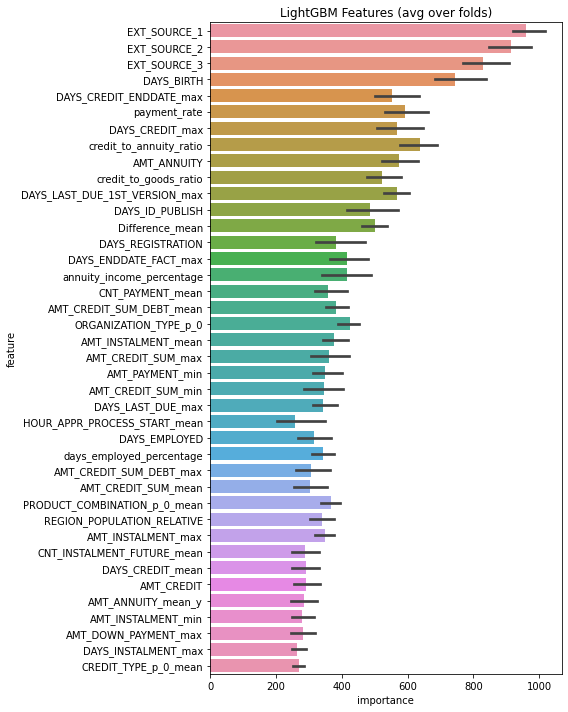

In [ ]:
feat_importance = kfold_lightgbm(train,test , num_folds= 5, stratified = True)

**STACKING**

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier # <- Here is our boy


# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
downloaded = drive.CreateFile({'id':'13x3D_mFjxe1wAVfYp_gBB4-I9SglkH8E'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv') 


In [ ]:
downloaded = drive.CreateFile({'id':'1rOhgv7gt6ZbEbrUIkFSvjBIotIvHF0yz'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv') 


In [ ]:
train = pd.read_csv('train.csv',index_col=False)
print(train.shape)
test=pd.read_csv("test.csv",index_col=False)
print(test.shape)

(307507, 423)
(48744, 422)


In [ ]:
train=train.iloc[:,1:]
test=test.iloc[:,1:]

In [ ]:
for i in train.columns:
    if train[i].isnull().values.any():
          nu=train[i].mean()
          train[i]=train[i].fillna(nu)
          test[i]=test[i].fillna(nu)
for i in test.columns:
    if test[i].isnull().values.any():
          nu=train[i].mean()
          test[i]=test[i].fillna(nu)

In [ ]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]
test =test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]
print(test.shape)

(48744, 421)


In [ ]:
X_1, X_test,y_1,y_test= train_test_split(train,train.TARGET, test_size = 0.20, stratify=train.TARGET)
X_train, X_eval,y_train,y_eval= train_test_split(X_1,y_1, test_size = 0.50, stratify=X_1.TARGET)

In [ ]:
t={}
for i in range(3):
  t[str(i)]=X_train.sample(n=X_train.shape[0],replace=True)
columns=X_train.columns
columns=list(columns)
columns.remove("TARGET")

In [ ]:
classifier1 = LogisticRegression()

classifier2 = KNeighborsClassifier()

classifier3 = DecisionTreeClassifier()

classifier4=LogisticRegression()

**METHOD 1**

In [ ]:
classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "DTC": classifier3
               }
for index,key in enumerate(classifiers):
    # Get classifier
    print(key)

    classifier = classifiers[key]

    t_d=pd.DataFrame(t[str(index)])
    
    # Fit classifier
    classifier.fit(t_d[columns],t_d["TARGET"])
        
    # Save fitted classifier
    classifiers[key] = classifier

LR
KNN
DTC


In [ ]:
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = classifier4)

In [ ]:
model=sclf.fit(X_eval[columns].values,X_eval["TARGET"].values)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
y_pred=model.predict_proba(X_test[columns])
print('Full AUC score %.4f' % roc_auc_score(X_test["TARGET"], y_pred[:,1]))

Full AUC score 0.6319


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
test["TARGET"]=model.predict_proba(test)[:,1]
test[['SK_ID_CURR', 'TARGET']].to_csv("submission_file_name_stacking_1.csv", index= False)


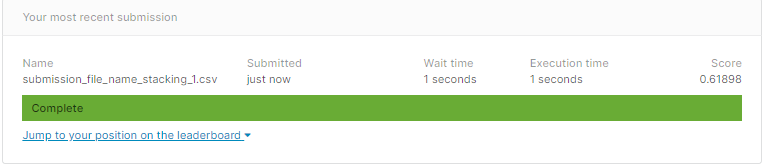

In [ ]:
t={}
for i in range(4):
  t[str(i)]=X_train.sample(n=X_train.shape[0],replace=True)
columns=X_train.columns
columns=list(columns)
columns.remove("TARGET")

**METHOD 2**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier1 = LogisticRegression()

classifier2 = KNeighborsClassifier()

classifier3 = RandomForestClassifier()

classifier4 = GaussianNB()

classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "RF": classifier3,
               "GNB": classifier4
               }
for index,key in enumerate(classifiers):
    # Get classifier
    print(key)

    classifier = classifiers[key]

    t_d=pd.DataFrame(t[str(index)])
    
    # Fit classifier
    classifier.fit(t_d[columns],t_d["TARGET"])
        
    # Save fitted classifier
    classifiers[key] = classifier

LR
KNN
RF
GNB


In [ ]:
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = classifier3)

In [ ]:
model=sclf.fit(X_eval[columns].values,X_eval["TARGET"].values)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
y_pred=model.predict_proba(X_test[columns])
print('Full AUC score %.4f' % roc_auc_score(X_test["TARGET"], y_pred[:,1]))

Full AUC score 0.6595


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
test["TARGET"]=model.predict_proba(test)[:,1]
test[['SK_ID_CURR', 'TARGET']].to_csv("submission_file_name_stacking_2.csv", index= False)


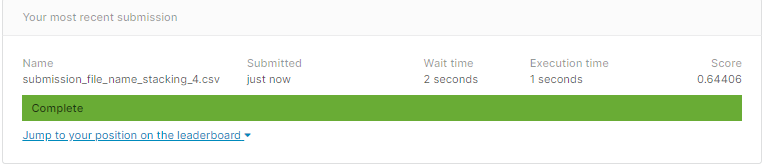

**METHOD 3**

In [ ]:
t={}
for i in range(4):
  t[str(i)]=X_train.sample(n=X_train.shape[0],replace=True)
columns=X_train.columns
columns=list(columns)
columns.remove("TARGET")

In [ ]:
from lightgbm import LGBMClassifier

classifier1 = LogisticRegression()

classifier2 = KNeighborsClassifier()

classifier3 = LGBMClassifier()

classifier4 = GaussianNB()

classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "LGBM": classifier3,
               "GNB": classifier4
               }
for index,key in enumerate(classifiers):
    # Get classifier
    print(key)

    classifier = classifiers[key]

    t_d=pd.DataFrame(t[str(index)])
    
    # Fit classifier
    classifier.fit(t_d[columns],t_d["TARGET"])
        
    # Save fitted classifier
    classifiers[key] = classifier

LR
KNN
LGBM
GNB


In [ ]:
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = classifier3)

In [ ]:
model=sclf.fit(X_eval[columns].values,X_eval["TARGET"].values)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
y_pred=model.predict_proba(X_test[columns])
print('Full AUC score %.4f' % roc_auc_score(X_test["TARGET"], y_pred[:,1]))

Full AUC score 0.7761


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
test["TARGET"]=model.predict_proba(test)[:,1]
test[['SK_ID_CURR', 'TARGET']].to_csv("submission_file_name_stacking_6.csv", index= False)

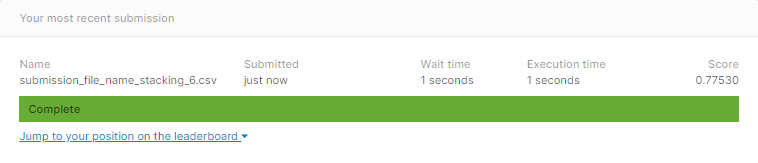

# **OBSERVATION OF EVALUATION**

We observe that LightGBM gives the best result on the unseen test data which is .7938 compared to all the other models.